참고문헌

- 파이썬 딥러닝 파이토치 (이경택, 방심수, 안상준 지음), 정보문화사

- https://gaussian37.github.io/dl-pytorch-snippets/

- 2023 KAIA 한국인공지능학회 / Introduction to pytorch (Hyunchul Kim) / 링크 : https://www.youtube.com/watch?v=YX-AgT-Kovg

- PyTorch로 시작하는 딥 러닝 입문 (유원준, 안상준 지음), 링크 : https://wikidocs.net/book/2788

# Natural Language Processing (NLP; 자연어 처리)


## 1. NLP 기초

NLP는 크게 다음과 같은 세가지 단계로 나누어집니다.

1. 문서 전처리 & 토큰화
  + 문장/단어(토큰) 단위 분할: 예) 단어 토큰화(영어), 형태소 분석(한국어) 등
  + 불용어 제거(Stopwords), 정규화(Normalization): 대소문자 통일, 특수문자 제거 등
  + (선택) 형태소 분석(Morphological Analysis), 어간 추출(Stemming), 표제어 추출(Lemmatization): 언어마다 필요한 작업이 달라질 수 있음

2. 임베딩(Embedding) 또는 벡터화
  + 전처리된 텍스트를 수치화된 벡터로 변환
  + 전통 기법: Bag-of-Words, TF-IDF 등(단어 순서를 고려하지 않거나 제한적으로 고려)
  + 딥러닝 임베딩: Word2Vec, GloVe 같은 정적(Static) 임베딩, 최근에는 BERT, GPT류의 문맥적(Contextual) 임베딩도 널리 쓰임

3. 모델 적용 & 분석
  + 벡터화된 텍스트를 AI 모델에 입력하여 결과(분류, 예측 등) 도출
  + 예) RNN, LSTM, GRU, 혹은 Transformer 기반 모델을 통해 텍스트 분류, 감성 분석, 번역, 요약 등 다양한 NLP 과제 수행
  + 분석 결과(예측값, 확률 등)에 대해 평가 지표(정확도, F1 점수 등) 확인

### (Step 1) 전처리 & 토큰화

- 자연어를 전처리 및 토큰화하는 과정을 간략하게 살펴본다.
- 일반적으로 토큰화, 단어 집합 생성, 정수 인코딩, 패딩, 벡터화의 과정을 거친다.

#### (a) 토큰화 (Tokenization)

- 토큰화 (Tokenization) : 주어진 텍스트를 단어 또는 문자 단위로 자르는 것
- 영어의 경우 토큰화를 사용하는 도구로는 `spaCy`와 `NLTK`등이 있다.
  +  다만 요즘 딥러닝 기반 NLP가 확산되면서 Transformer 모델(예: BERT, GPT 등)에서 제공하는 **서브워드 토크나이저(WordPiece, SentencePiece, BPE 등)**가 주로 사용되고 있습니다.
    + (예시) "unwanted" -> “un + ##want + ##ed” 같은 식으로 쪼개어 (기존에 학습된 조각들)로 표현
- en_text = "A Dog Run back corner near spare bedrooms" 에 대해서 다음과 같이 토큰화를 할 수 있습니다

In [1]:
en_text = "A Dog Run back corner near spare bedrooms"

In [2]:
# 방법 1. spaCy 사용하기
import spacy
spacy_en = spacy.load('en_core_web_sm')

def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

print(tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


In [4]:
# 방법 2. NLTK 사용하기
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

print(tokenizer.tokenize(en_text))

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
# 방법 3. 띄어쓰기로 토큰화
print(en_text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


- 사실 영어의 경우에는 띄어쓰기 단위로 토큰화를 해도 단어들 간 구분이 꽤나 명확하기 때문에, 토큰화 작업이 수월합니다.
- 하지만 한국어의 경우에는 토큰화 작업이 훨씬 까다롭습니다.
- 그 이유는 한국어는 조사, 접사 등으로 인해 단순 띄어쓰기 단위로 나누면 같은 단어가 다른 단어로 인식되어서 단어 집합(vocabulary)의 크기가 불필요하게 커지기 때문입니다.
  + 단어 집합(vocabuary)이란 중복을 제거한 텍스트의 총 단어의 집합(set)을 의미
- 예를 들어 단어 '사과'가 많이 들어간 어떤 문장에 띄어쓰기 토큰화를 한다면 '사과가', '사과를', '사과의', '사과와', '사과는'과 같은 식으로 같은 단어임에도 조사가 붙어서 다른 단어로 인식될 수 있습니다.

In [6]:
# 한국어 - 방법 1.  한국어 띄어쓰기 토큰화
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


- '사과'란 단어가 총 4번 등장했는데 모두 '의', '를', '가', '랑' 등이 붙어있어 이를 제거해주지 않으면 기계는 전부 다른 단어로 인식하게 됩니다.

- 위와 같은 상황을 방지하기 위해서 한국어는 보편적으로 **형태소 분석기**로 토큰화
  + `mecab`을 활용한 예시 :

In [7]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91 (from 1)
Receiving objects: 100% (138/138), 1.72 MiB | 6.89 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 27.9 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-12-27 11:17:15--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 13.200.41.135, 13.200.41.134, 13.200.41.136, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.135|:443... connected.
HTTP request sent, await

In [8]:
# 한국어 - 방법 2. 형태소 토큰화
from konlpy.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


- 이 외에도 자연어를 토큰화할 때는 다른 전처리 과정이 다수 포함됩니다. 예를 들어, 정제, 정규화, 불용어 처리 등이 있습니다.
  + 정제(cleaning) : 노이즈 데이터를 제거한다.
    + (예시) 자연어가 아니면서 아무 의미도 갖지 않는 글자들(특수 문자 등) 혹은 등장 빈도가 적은 단어 등
  + 정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다.
    + (예시) US = USA 혹은 대문자 소문자 통합 등
  + 불용어 처리 : 큰 의미가 없는 단어 토큰을 제거
    + 한국어에 대한 형태소 토큰화를 한 이후, '의', '이' 등의 조사 제거 등


### (b) 단어 집합(Vocabulary) 생성

- 단어 집합(vocabuary)이란 중복을 제거한 텍스트의 총 단어의 집합(set)을 의미합니다. - 실습을 위해서 깃허브에서 '네이버 영화 리뷰 분류하기' 데이터를 다운로드하겠습니다.
  + 네이버 영화 리뷰 데이터는 총 20만 개의 영화 리뷰를 긍정 1, 부정 0으로 레이블링한 데이터입니다.

In [10]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [12]:
print('전체 샘플의 수 : {}'.format(len(data)))

전체 샘플의 수 : 200000


In [13]:
sample_data = data[:100] # 임의로 100개만 저장

정규 표현식을 통해서 데이터를 정제합니다.

- 언어 모델을 사용할 때는 전처리로 정제(cleaning; 갖고 있는 코퍼스로부터 노이즈 데이터를 제거)와 정규화(normalization; 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 변화)가 필요
  + 예를 들어, USA와 US는 같은 의미를 가지므로 하나의 단어로 정규화
- 정규 표현식은 이러한 코퍼스 내에 계속해서 등장하는 글자들을 규칙에 기반하여 한 번에 제거하는 방식으로서 매우 유용

In [14]:
# 정규 표현식을 통해서 데이터를 정제합니다.
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)
# 한글과 공백을 제외하고 모두 제거

sample_data[:10]

<ipython-input-14-8291604f3626>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


토큰화를 수행해보겠습니다. 토큰화 과정에서 불용어를 제거하기 위해 불용어를 우선 정의합니다.

- 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어인 불용어를 제거.

In [15]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

형태소 분석기는 mecab을 사용합니다.

In [16]:
tokenizer = Mecab()
tokenized=[]
for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


이제 단어 집합을 만들어봅시다. NLTK에서는 빈도수 계산 도구인 `FreqDist()`를 지원합니다.

In [17]:
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 664


단어를 키(key)로, 단어에 대한 빈도수가 값(value)으로 저장되어져 있습니다. vocab에 단어를 입력하면 빈도수를 리턴합니다.

In [18]:
vocab['재밌']

10

'재밌'이란 단어가 총 10번 등장하였습니다. `most_common()`는 상위 빈도수를 가진 주어진 수의 단어만을 리턴합니다. 이를 사용하여 등장 빈도수가 높은 단어들을 원하는 개수만큼만 얻을 수 있습니다. 등장 빈도수 상위 500개의 단어만 단어 집합으로 저장해봅시다.

In [19]:
vocab_size = 500 # 600
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


단어 집합의 크기가 500으로 줄어든 것을 확인할 수 있습니다.

### (c) 각 단어에 고유한 정수 부여

- enumerate()는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스를 순차적으로 함께 리턴한다는 특징이 있습니다.
- 인덱스 0과 1은 다른 용도로 남겨두고 나머지 단어들은 2부터 501까지 순차적으로 인덱스를 부여해봅시다.

In [20]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

# 문장의 길이를 맞추기 위한 [pad]
# 없는 글자를 처리하기 위한 [unk]
word_to_index

{'다': 2,
 '영화': 3,
 '고': 4,
 '을': 5,
 '하': 6,
 '있': 7,
 '게': 8,
 '보': 9,
 '없': 10,
 '최고': 11,
 '좋': 12,
 '는데': 13,
 '수': 14,
 '봤': 15,
 '재밌': 16,
 '같': 17,
 '적': 18,
 '할': 19,
 '었': 20,
 '내': 21,
 '만': 22,
 '정말': 23,
 '해': 24,
 '음': 25,
 '였': 26,
 '때': 27,
 '어요': 28,
 'ㅋㅋ': 29,
 '에서': 30,
 '까지': 31,
 '것': 32,
 '진짜': 33,
 '했': 34,
 '지': 35,
 '본': 36,
 '감동': 37,
 '로': 38,
 '아': 39,
 '네요': 40,
 '너무': 41,
 '다시': 42,
 '그': 43,
 '사람': 44,
 '연기': 45,
 '생각': 46,
 '싶': 47,
 '나': 48,
 '으면': 49,
 '지금': 50,
 '사실': 51,
 '저': 52,
 '부터': 53,
 '하나': 54,
 '나오': 55,
 '굿': 56,
 '인': 57,
 '왜': 58,
 '네': 59,
 '년': 60,
 '마음': 61,
 '말': 62,
 '거': 63,
 '재미있': 64,
 '뭐': 65,
 '지만': 66,
 '중': 67,
 '어': 68,
 '라고': 69,
 '이런': 70,
 '았': 71,
 '평점': 72,
 '된': 73,
 '기': 74,
 '속': 75,
 '면서': 76,
 '주': 77,
 '건': 78,
 '어릴': 79,
 '봐도': 80,
 '배우': 81,
 '우리': 82,
 '다는': 83,
 '합니다': 84,
 '웃': 85,
 '면': 86,
 '아니': 87,
 '라': 88,
 '듯': 89,
 '낮': 90,
 '인데': 91,
 '서': 92,
 '던': 93,
 '마지막': 94,
 '대한': 95,
 '명작': 96,
 '될': 97,
 '는지

이제 기존의 훈련 데이터에서 각 단어를 고유한 정수로 부여하는 작업을 진행해보겠습니다.

In [21]:
encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

print(encoded[:10])

[[79, 27, 9, 4, 50, 42, 80, 16, 28, 29], [188, 5, 81, 189, 190, 191, 43, 192, 113, 5, 193, 194, 24, 114, 195, 196, 13, 51, 82, 115, 30, 43, 197, 116, 117, 31, 198, 5, 199, 200, 17, 113, 7, 68, 52, 17, 44, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84], [205, 118, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11], [45, 33, 119, 210, 211, 212, 213, 69, 46, 34, 13, 214, 120, 15, 2, 215, 70, 8, 33, 3, 35], [216, 217, 218, 219, 7, 220, 17, 3], [121, 5, 24, 36, 44, 122, 123, 53, 117, 31, 85, 5, 14, 7, 3], [124, 37, 221, 42, 80, 37], [119, 222, 55, 223, 55, 86, 224, 38, 9, 4, 47, 25], [56], [225, 87, 88, 226, 227, 57, 89]]


#### 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding)

- 이제 길이가 다른 리뷰들을 모두 동일한 길이로 바꿔주는 패딩 작업을 진행해보겠습니다.
- 앞서 단어 집합에 패딩을 위한 토큰인 'pad'를 추가했었습니다.
- 패딩 작업은 정해준 길이로 모든 샘플들의 길이를 맞춰주되, 길이가 정해준 길이보다 짧은 샘플들에는 'pad' 토큰을 추가하여 길이를 맞춰주는 작업입니다.

리뷰의 최대 길이 : 62
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.900000


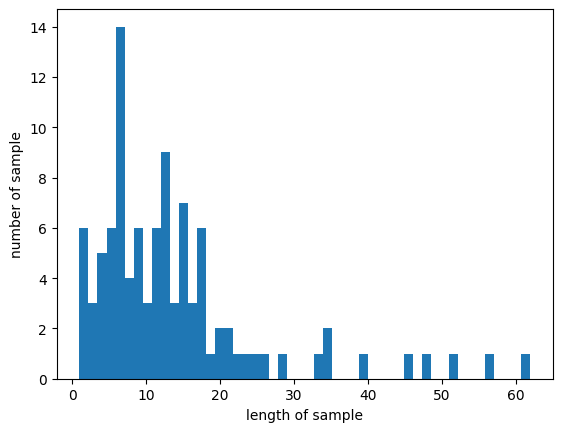

In [22]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

가장 길이가 긴 리뷰의 길이는 63입니다. 모든 리뷰의 길이를 63으로 통일시켜주겠습니다.

In [23]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [24]:
print(encoded[:3])

[[79, 27, 9, 4, 50, 42, 80, 16, 28, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [188, 5, 81, 189, 190, 191, 43, 192, 113, 5, 193, 194, 24, 114, 195, 196, 13, 51, 82, 115, 30, 43, 197, 116, 117, 31, 198, 5, 199, 200, 17, 113, 7, 68, 52, 17, 44, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [205, 118, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


- 이제 단어들을 고유한 정수로 맵핑하였으니, 각 정수를 수치화된 벡터로 바꾸는 작업이 필요합니다. 즉, Step 2인 임베딩이 필요합니다.


## (Step 2) 임베딩 (Embedding)

- 문서를 벡터화 하는 방법에 대해서 학습합니다.
- 각 정수를 벡터로 바꾸는 과정은 크게 원-핫 인코딩과 **임베딩**이 있는데, 주로 임베딩이 사용됩니다.
  + 원-핫 인코딩(One-hot encoding)
  + **임베딩(Embedding)**

###  원-핫 인코딩(One-hot encoding)이란

원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식입니다. 이렇게 표현된 벡터를 원-핫 벡터(One-hot vector)라고 합니다.

원-핫 인코딩을 두 가지 과정으로 정리해보겠습니다.
- (1) 각 단어에 고유한 인덱스를 부여합니다. (정수 인코딩)
- (2) 표현하고 싶은 단어의 인덱스의 위치에 1을 부여하고, 다른 단어의 인덱스의 위치에는 0을 부여합니다.

<img src='https://drive.google.com/uc?export=download&id=1dqHgahjYHAZnhg2tb1ij8_17WUHtBaOz' width="" height ="" /><br>

이해를 돕기 위해서 한국어 문장을 예제로 원-핫 벡터를 만들어보겠습니다.
우선, 한국어 자연어 처리를 위해 코엔엘파이 패키지를 설치합니다.

In [ ]:
!pip install konlpy

**문장 : 나는 자연어 처리를 배운다**

위 문장에 대해서 원-핫 인코딩을 진행하는 코드는 아래와 같습니다.

In [ ]:
from konlpy.tag import Okt
okt = Okt()
token = okt.morphs("나는 자연어 처리를 배운다")
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


코엔엘파이의 Okt 형태소 분석기를 통해서 우선 문장에 대해서 토큰화를 수행하였습니다.

In [ ]:
word2index = {}
for voca in token:
     if voca not in word2index.keys():
       word2index[voca] = len(word2index)

print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


각 토큰에 대해서 고유한 인덱스(index)를 부여하였습니다. 지금은 문장이 짧기 때문에 각 단어의 빈도수를 고려하지 않지만, 빈도수 순대로 단어를 정렬하여 고유한 인덱스를 부여하는 작업이 사용되기도 합니다.

In [ ]:
def one_hot_encoding(word, word2index):
    one_hot_vector = [0]*(len(word2index))
    index = word2index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

토큰을 입력하면 해당 토큰에 대한 원-핫 벡터를 만들어내는 함수를 만들었습니다.

In [ ]:
one_hot_encoding("자연어",word2index)

[0, 0, 1, 0, 0, 0]

해당 함수에 '자연어'라는 토큰을 입력으로 넣어봤더니 [0, 0, 1, 0, 0, 0]라는 벡터가 나왔습니다. 자연어는 단어 집합에서 인덱스가 2이므로, 자연어를 표현하는 원-핫 벡터는 인덱스 2의 값이 1이며, 나머지 값은 0인 벡터가 나옵니다.

- 이러한 표현 방식은 단어의 개수가 늘어날 수록, 벡터를 저장하기 위해 필요한 공간이 계속 늘어난다는 단점이 있습니다. 다른 말로는 벡터의 차원이 계속 늘어난다고도 표현합니다. 원 핫 벡터는 단어 집합의 크기가 곧 벡터의 차원 수가 됩니다.

- 또한 원-핫 벡터는 단어의 유사도를 표현하지 못한다는 단점이 있습니다.
  + 예를 들어서 늑대, 호랑이, 강아지, 고양이라는 4개의 단어에 대해서 원-핫 인코딩을 해서 각각, [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]이라는 원-핫 벡터를 부여받았다고 합시다.
  + 이 때 원-핫 벡터로는 강아지와 늑대가 유사하고, 호랑이와 고양이가 유사하다는 것을 표현할 수가 없습니다.

- 이러한 한계를 극복하기 위한 것이 워드 임베딩

<img src='https://drive.google.com/uc?export=download&id=1wFR-_7HBvJlzA4a55yZ7BwamezU4gKbp' width="" height ="" /><br>

### 임베딩(Embedding)

파이토치에서는 임베딩 벡터를 사용하는 방법이 크게 두 가지가 있습니다.

- `nn.embedding()` : 임베딩 층(embedding layer)을 만들어 훈련 데이터로부터 처음부터 임베딩 벡터를 학습.
  + 단어를 랜덤한 값을 가지는 밀집 벡터로 변환한 뒤에, 인공 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습
- 사전에 훈련된 임베딩 벡터(pre-trained word embedding)들을 가져와 사용하는 방법
  + `Word2Vec`, `Glove` 등.


#### (a) 파이토치(PyTorch)의 `nn.Embedding()`

In [25]:
train_data = 'you need to know how to code'

# 중복을 제거한 단어들의 집합인 단어 집합 생성.
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑.
vocab = {tkn: i+2 for i, tkn in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1


이제 `nn.Embedding()`을 사용하여 학습가능한 임베딩 테이블을 만듭니다.

In [26]:
import torch.nn as nn
embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                               embedding_dim=3,
                               padding_idx=1)

`nn.Embedding`은 크게 두 가지 인자를 받는데 각각 `num_embeddings`과 `embedding_dim`입니다.

- `num_embeddings` : 임베딩을 할 단어들의 개수. 다시 말해 단어 집합의 크기입니다.
- `embedding_dim` : 임베딩 할 벡터의 차원입니다. 사용자가 정해주는 하이퍼파라미터입니다.
- `padding_idx` : 선택적으로 사용하는 인자입니다. 패딩을 위한 토큰의 인덱스를 알려줍니다.

In [27]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3682, -0.6995, -1.2260],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.8029, -0.0241,  0.6877],
        [-0.7583, -0.0071,  0.1141],
        [ 0.4690, -1.6141,  0.2748],
        [ 0.2197,  1.1585,  0.4956],
        [-2.1068, -0.5348, -0.5965],
        [ 0.2858, -1.5039, -1.1757]], requires_grad=True)


#### (b) 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)

임베딩 벡터를 얻기 위해서 파이토치의 `nn.Embedding()`을 사용하기도 하지만, 때로는 이미 훈련되어져 있는 워드 임베딩을 불러서 이를 임베딩 벡터로 사용하기도 합니다. 훈련 데이터가 부족한 상황이라면 모델에 파이토치의 `nn.Embedding()`을 사용하는 것보다 다른 텍스트 데이터로 사전 훈련되어 있는 임베딩 벡터를 불러오는 것이 나은 선택일 수 있습니다.

훈련 데이터가 적다면 파이토치의 `nn.Embedding()`으로 해당 문제에 충분히 특화된 임베딩 벡터를 만들어내는 것이 쉽지 않습니다. 이 경우, 해당 문제에 특화된 것은 아니지만 보다 일반적이고 보다 많은 훈련 데이터로 이미 `Word2Vec`이나 `GloVe` 등으로 학습되어져 있는 임베딩 벡터들을 사용하는 것이 성능의 개선을 가져올 수 있습니다.

In [28]:
!pip install gensim

### 4-1) 사전 훈련된 임베딩을 사용하지 않는 경우

In [29]:
import numpy as np
from collections import Counter
import gensim

문장의 긍, 부정을 판단하는 감성 분류 모델을 만들어봅시다. 문장과 레이블 데이터를 만들었습니다. 긍정인 문장은 레이블 1, 부정인 문장은 레이블이 0입니다.

In [30]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

각 샘플에 대해서 단어 토큰화를 수행합니다.

In [31]:
tokenized_sentences = [sent.split() for sent in sentences]
print('단어 토큰화 된 결과 :', tokenized_sentences)

단어 토큰화 된 결과 : [['nice', 'great', 'best', 'amazing'], ['stop', 'lies'], ['pitiful', 'nerd'], ['excellent', 'work'], ['supreme', 'quality'], ['bad'], ['highly', 'respectable']]


토큰화 된 결과를 바탕으로 단어 집합을 만들어봅시다. 우선 Counter() 모듈을 이용하여 각 단어의 등장 빈도수를 기록합니다.

In [32]:
word_list = []
for sent in tokenized_sentences:
    for word in sent:
      word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))

총 단어수 : 15


현재 존재하는 총 단어의 수는 15개입니다. 이 단어들을 등장 빈도가 높은 순서부터 정렬합니다.

In [33]:
# 등장 빈도순으로 정렬
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print(vocab)

['nice', 'great', 'best', 'amazing', 'stop', 'lies', 'pitiful', 'nerd', 'excellent', 'work', 'supreme', 'quality', 'bad', 'highly', 'respectable']


nice가 등장 빈도수로 가장 높은 단어이고, 그 다음은 great, 그 다음은 best로 등장 빈도가 높은 순서대로 단어가 정렬된 상태입니다. 이제 이로부터 단어 집합을 완성해봅시다. 0번은 패딩 토큰을 위한 용도로 사용하고, 1번은 단어 집합에 없는 단어가 등장하는 OOV(Out-Of-Vocabulary) 문제가 발생하면 사용하는 용도로 각각 할당합니다.

In [34]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab) :
  word_to_index[word] = index + 2

vocab_size = len(word_to_index)
print('패딩 토큰, UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)


패딩 토큰, UNK 토큰을 고려한 단어 집합의 크기 : 17


단어 집합의 크기는 17입니다. 출력 결과는 다음과 같습니다.

In [35]:
print(word_to_index)

{'<PAD>': 0, '<UNK>': 1, 'nice': 2, 'great': 3, 'best': 4, 'amazing': 5, 'stop': 6, 'lies': 7, 'pitiful': 8, 'nerd': 9, 'excellent': 10, 'work': 11, 'supreme': 12, 'quality': 13, 'bad': 14, 'highly': 15, 'respectable': 16}


단어 집합을 이용하여 정수 인코딩을 진행합니다. 단어 집합에 없는 단어가 등장할 경우에는 정수 1이 할당되지만 이번 실습에서는 학습 데이터에 단어 집합에 없는 단어가 존재하지 않으므로 해당되지 않습니다.

In [36]:
def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

X_encoded = texts_to_sequences(tokenized_sentences, word_to_index)
print(X_encoded)

[[2, 3, 4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14], [15, 16]]


현재 데이터의 최대 길이를 측정하고, 해당 길이로 패딩을 진행합니다.

In [37]:
max_len = max(len(l) for l in X_encoded)
print('최대 길이 :',max_len)

최대 길이 : 4


In [38]:
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

X_train = pad_sequences(X_encoded, max_len=max_len)
y_train = np.array(y_train)
print('패딩 결과 :')
print(X_train)


패딩 결과 :
[[ 2  3  4  5]
 [ 6  7  0  0]
 [ 8  9  0  0]
 [10 11  0  0]
 [12 13  0  0]
 [14  0  0  0]
 [15 16  0  0]]


모든 데이터의 길이가 4로 변환된 것을 확인하였습니다. 이제 `nn.Embedding()`를 이용하여 모델을 설계합니다.

In [39]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset


In [40]:
class SimpleModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SimpleModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(embedding_dim * max_len, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # embedded.shape == (배치 크기, 문장의 길이, 임베딩 벡터의 차원)
        embedded = self.embedding(x)

        # flattend.shape == (배치 크기, 문장의 길이 × 임베딩 벡터의 차원)
        flattened = self.flatten(embedded)

        # output.shape == (배치 크기, 1)
        output = self.fc(flattened)
        return self.sigmoid(output)


모델 객체를 선언합니다. 임베딩 벡터의 크기는 100으로 정했습니다.

In [41]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

embedding_dim = 100
simple_model = SimpleModel(vocab_size, embedding_dim).to(device)


출력층에 로지스틱 회귀를 이용한 이진 분류 문제를 푸는 모델이므로 손실 함수로는 바이너리 크로스엔트로피 함수에 해당하는 `nn.BCELoss()`를 사용합니다.

In [42]:
criterion = nn.BCELoss()
optimizer = Adam(simple_model.parameters())


데이터를 배치 크기 2로 설정한 데이터로더로 변환합니다.

In [43]:
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.long), torch.tensor(y_train, dtype=torch.float32))
train_dataloader = DataLoader(train_dataset, batch_size=2)


데이터가 7개였으므로 배치 크기 2로 묶으면 총 묶음은 4개(2개, 2개, 2개, 1개)가 됩니다.

In [44]:
print(len(train_dataloader))


4


총 10번 학습합니다.

In [45]:
for epoch in range(10):
    for inputs, targets in train_dataloader:
        # inputs.shape == (배치 크기, 문장 길이)
        # targets.shape == (배치 크기)
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        # outputs.shape == (배치 크기)
        outputs = simple_model(inputs).view(-1)

        loss = criterion(outputs, targets)
        loss.backward()

        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 0.8481619358062744
Epoch 2, Loss: 0.5882623195648193
Epoch 3, Loss: 0.400343656539917
Epoch 4, Loss: 0.28641393780708313
Epoch 5, Loss: 0.22234389185905457
Epoch 6, Loss: 0.1870885193347931
Epoch 7, Loss: 0.1671459972858429
Epoch 8, Loss: 0.15437524020671844
Epoch 9, Loss: 0.14393948018550873
Epoch 10, Loss: 0.1333150714635849


### 4-2) 사전 훈련된 임베딩을 사용하는 경우

구글에서 사전 학습시킨 Word2Vec 모델을 사용하여 문제를 풀어봅시다. 우선 구글에서 사전 학습시킨 Word2Vec 모델을 다운로드 합니다.

In [48]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j

Downloading...
From (original): https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j
From (redirected): https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j&confirm=t&uuid=e3e728c4-b3d4-4798-931e-20fc75f32c0a
To: /content/Mecab-ko-for-Google-Colab/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:45<00:00, 36.3MB/s]


머신 러닝 라이브러리 gensim을 이용하여 해당 모델을 다운로드합니다.

In [49]:
# 구글의 사전 훈련된 Word2vec 모델을 로드합니다.
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

위 모델은 각 벡터가 300차원으로 구성되어져 있습니다. 풀고자 하는 문제의 단어 집합 크기의 행과 300개의 열을 가지는 행렬 생성합니다. 이 행렬의 값은 전부 0으로 채웁니다. 이 행렬에 사전 훈련된 임베딩 값을 넣어줄 것입니다.

In [50]:
embedding_matrix = np.zeros((vocab_size, 300))
print('임베딩 행렬의 크기 :', embedding_matrix.shape)


임베딩 행렬의 크기 : (17, 300)


word2vec_model에서 특정 단어를 입력하면 해당 단어의 임베딩 벡터를 리턴받을텐데, 만약 word2vec_model에 특정 단어의 임베딩 벡터가 없다면 None을 리턴하도록 하는 함수 `get_vector()`를 구현합니다.

In [52]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None


단어 집합으로부터 단어를 1개씩 호출하여 word2vec_model에 해당 단어의 임베딩 벡터값이 존재하는지 확인합니다. 만약 None이 아니라면 존재한다는 의미이므로 임베딩 행렬에 해당 단어의 인덱스 위치의 행에 임베딩 벡터의 값을 저장합니다.

In [53]:
# <PAD>를 위한 0번과 <UNK>를 위한 1번은 실제 단어가 아니므로 맵핑에서 제외
for word, i in word_to_index.items():
    if i > 2:
      temp = get_vector(word)
      if temp is not None:
          embedding_matrix[i] = temp


현재 풀고자하는 문제의 17개의 단어와 맵핑되는 임베딩 행렬이 완성됩니다. 0번 단어는 패딩을 위한 용도이므로 사전 훈련된 임베딩 벡터값이 불필요합니다. 이에 따라 초기값인 0벡터로 초기화가 되어져 있습니다. embedding_matrix의 0번 위치의 벡터를 출력해봅시다.

In [54]:
# <PAD>나 <UNK>의 경우는 사전 훈련된 임베딩이 들어가지 않아서 0벡터임
print(embedding_matrix[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


0이 300개 채워진 벡터임을 확인하였습니다. 이제 다른 단어들도 제대로 맵핑이 됐는지 확인해볼까요? 기존의 단어 집합에서 단어 'great'가 정수로 몇 번인지 확인합니다.

In [55]:
word_to_index['great']


3

3번 임을 확인했습니다. 이에 따라서 사전 훈련된 word2vec_model에서의 'great' 벡터와 현재 사전 훈련된 임베딩 벡터가 맵핑된 embedding_matrix의 3번 벡터가 동일한지 확인합니다.

In [56]:
# word2vec_model에서 'great'의 임베딩 벡터
# embedding_matrix[3]이 일치하는지 체크
np.all(word2vec_model['great'] == embedding_matrix[3])


True

동일한 것을 확인하였습니다. 이는 현재 3번 위치에 단어 'great' 벡터가 정상적으로 할당되었음을 의미합니다. 이제 사전 훈련된 임베딩을 이용한 모델을 구현합니다.

In [57]:
class PretrainedEmbeddingModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(PretrainedEmbeddingModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = True
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(embedding_dim * max_len, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        flattened = self.flatten(embedded)
        output = self.fc(flattened)
        return self.sigmoid(output)


모델 객체를 선언합니다. 이때 임베딩 벡터의 크기는 embedding_matrix에서 이미 정해진 임베딩 벡터의 차원인 300으로 해야만 합니다.

In [58]:
pretraiend_embedding_model = PretrainedEmbeddingModel(vocab_size, 300).to(device)


출력층에 로지스틱 회귀를 이용한 이진 분류 문제를 푸는 모델이므로 손실 함수로는 바이너리 크로스엔트로피 함수에 해당하는 nn.BCELoss()를 사용합니다.

In [59]:
criterion = nn.BCELoss()
optimizer = Adam(pretraiend_embedding_model.parameters())

데이터를 배치 크기 2로 설정한 데이터로더로 변환합니다.

In [60]:
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.long), torch.tensor(y_train, dtype=torch.float32))
train_dataloader = DataLoader(train_dataset, batch_size=2)


데이터가 7개였으므로 배치 크기 2로 묶으면 총 묶음은 4개(2개, 2개, 2개, 1개)가 됩니다.

In [61]:
print(len(train_dataloader))

4


총 10번 학습합니다.

In [62]:
for epoch in range(10):
    for inputs, targets in train_dataloader:
        # inputs.shape == (배치 크기, 문장 길이)
        # targets.shape == (배치 크기)
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        # outputs.shape == (배치 크기)
        outputs = pretraiend_embedding_model(inputs).view(-1)

        loss = criterion(outputs, targets)
        loss.backward()

        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 0.7208788990974426
Epoch 2, Loss: 0.6546679139137268
Epoch 3, Loss: 0.5890753269195557
Epoch 4, Loss: 0.5275224447250366
Epoch 5, Loss: 0.47091108560562134
Epoch 6, Loss: 0.41942813992500305
Epoch 7, Loss: 0.3729766607284546
Epoch 8, Loss: 0.3313283920288086
Epoch 9, Loss: 0.29418736696243286
Epoch 10, Loss: 0.26121941208839417


### 감성 분석(Sentiment Analysis) - Toy example 1

- 실제로 학습할 만한 대규모 데이터(IMDb, 네이버 영화리뷰 등) 대신 토이(Toy) 예시를 사용했습니다.
- 핵심은 "문장 전처리(토큰화) → 단어 임베딩(Embedding) → LSTM 통과 → 최종 분류" 흐름을 이해하는 것입니다.
- (주의): 실제로는 학습/검증/테스트 데이터 세트를 나누고, 더 큰 말뭉치를 사용해야 성능을 제대로 낼 수 있습니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# ------------------------------------------------
# 1. 간단한 예시용 텍스트 & 레이블 설정
# ------------------------------------------------
sentences = [
    "I love this movie",
    "This film was great",
    "Absolutely fantastic direction",
    "I hate this movie",
    "Terrible film ever",
    "Worst experience of my life"
]
labels = [1, 1, 1, 0, 0, 0]  # 1: 긍정(Positive), 0: 부정(Negative)

# ------------------------------------------------
# 2. 토큰화(Tokenizer) 함수 (간단히 공백 기준)
# ------------------------------------------------
def simple_tokenizer(sentence):
    return sentence.lower().split()

# ------------------------------------------------
# 3. 어휘 사전(Vocabulary) 구축
#    - 실제로는 더 체계적인 전처리(불용어 제거 등)와 토큰화 기법을 사용
# ------------------------------------------------
word2idx = {"<PAD>": 0}  # 패딩 토큰을 0번 인덱스로
idx2word = {0: "<PAD>"}

def build_vocab(sentences):
    idx = 1  # 1번 인덱스부터 실제 단어 할당
    for sent in sentences:
        tokens = simple_tokenizer(sent)
        for token in tokens:
            if token not in word2idx:
                word2idx[token] = idx
                idx2word[idx] = token
                idx += 1

build_vocab(sentences)
vocab_size = len(word2idx)  # 총 어휘 수
print("Vocabulary Size:", vocab_size)
# 예) {'<PAD>': 0, 'i':1, 'love':2, 'this':3, ... }

# ------------------------------------------------
# 4. Dataset 정의
# ------------------------------------------------
class SentimentDataset(Dataset):
    def __init__(self, sentences, labels, max_len=5):
        self.sentences = sentences
        self.labels = labels
        self.max_len = max_len

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        text = self.sentences[idx]
        label = self.labels[idx]

        # 1) 토큰화
        tokens = simple_tokenizer(text)

        # 2) 정수 인덱스로 변환
        token_ids = [word2idx[token] for token in tokens]

        # 3) padding (고정 길이 max_len으로 맞춤)
        if len(token_ids) < self.max_len:
            token_ids += [0] * (self.max_len - len(token_ids))  # 0 -> <PAD>
        else:
            token_ids = token_ids[:self.max_len]

        return {
            "input_ids": torch.tensor(token_ids, dtype=torch.long),
            "label": torch.tensor(label, dtype=torch.long)
        }

# ------------------------------------------------
# 5. 데이터셋/데이터로더 준비
# ------------------------------------------------
dataset = SentimentDataset(sentences, labels, max_len=5)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# ------------------------------------------------
# 6. 모델 정의: LSTM을 이용한 감성 분류
#    - 임베딩(Embedding) -> LSTM -> FC(Linear) -> 출력
# ------------------------------------------------
class LSTMSentimentClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes):
        super(LSTMSentimentClassifier, self).__init__()

        # (1) 임베딩 레이어
        self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                      embedding_dim=embed_dim,
                                      padding_idx=0)  # <PAD> 인덱스=0

        # (2) LSTM 레이어
        self.lstm = nn.LSTM(input_size=embed_dim,
                            hidden_size=hidden_dim,
                            batch_first=True,
                            bidirectional=False)

        # (3) Fully-connected (출력) 레이어
        self.fc = nn.Linear(in_features=hidden_dim, out_features=num_classes)

    def forward(self, input_ids):
        # input_ids shape: (batch_size, seq_len)

        # 1) 임베딩
        embedded = self.embedding(input_ids)
        # embedded shape: (batch_size, seq_len, embed_dim)

        # 2) LSTM
        # LSTM은 (output, (h_n, c_n))을 반환
        # output shape: (batch_size, seq_len, hidden_dim)
        # h_n shape: (num_layers * num_directions, batch_size, hidden_dim)
        lstm_out, (h_n, c_n) = self.lstm(embedded)

        # 여기서는 마지막 hidden state (h_n)을 사용해 분류
        # 단일 방향(single direction)이므로 h_n shape는 (1, batch, hidden_dim)
        # => squeeze 해주면 (batch, hidden_dim)
        h_n = h_n.squeeze(dim=0)  # (batch_size, hidden_dim)

        # 3) 최종 분류
        logits = self.fc(h_n)  # (batch_size, num_classes)
        return logits

# ------------------------------------------------
# 7. 모델 초기화 및 학습 셋업
# ------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMSentimentClassifier(
    vocab_size=vocab_size,  # 어휘 사전 크기
    embed_dim=16,           # 임베딩 차원 (자유롭게)
    hidden_dim=8,           # LSTM hidden 차원
    num_classes=2           # 긍정/부정 => 2개 클래스
).to(device)

criterion = nn.CrossEntropyLoss()  # 이진 분류지만, 출력을 2차원으로 -> Cross Entropy
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ------------------------------------------------
# 8. 학습 루프 (Training)
# ------------------------------------------------
num_epochs = 5
model.train()

for epoch in range(num_epochs):
    total_loss = 0.0

    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        labels = batch["label"].to(device)

        # Forward
        logits = model(input_ids)
        # logits shape: (batch_size, 2)

        loss = criterion(logits, labels)

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

print("Training finished!\n")

# ------------------------------------------------
# 9. 간단 추론(평가)
# ------------------------------------------------
model.eval()

test_texts = [
    "I really love this film",
    "What a terrible experience"
]

with torch.no_grad():
    for text in test_texts:
        tokens = simple_tokenizer(text)
        token_ids = [word2idx.get(token, 0) for token in tokens]  # 없는 단어면 일단 0(<PAD>) 처리

        # 임시로 최대 길이=5로 맞추기(패딩 또는 잘라내기)
        if len(token_ids) < 5:
            token_ids += [0]*(5-len(token_ids))
        else:
            token_ids = token_ids[:5]

        input_tensor = torch.tensor([token_ids], dtype=torch.long).to(device)  # (1, seq_len)

        output = model(input_tensor)  # (1, 2)
        pred = torch.argmax(output, dim=-1).item()

        sentiment = "Positive" if pred == 1 else "Negative"
        print(f"Text: {text}")
        print(f"Predicted sentiment: {sentiment}, Raw logits: {output.cpu().numpy()}\n")


Vocabulary Size: 19
Epoch [1/5], Loss: 0.7012
Epoch [2/5], Loss: 0.6986
Epoch [3/5], Loss: 0.6970
Epoch [4/5], Loss: 0.6954
Epoch [5/5], Loss: 0.6941
Training finished!

Text: I really love this film
Predicted sentiment: Positive, Raw logits: [[-0.35132486 -0.02327562]]

Text: What a terrible experience
Predicted sentiment: Positive, Raw logits: [[-0.21738939  0.06115747]]



- 위 예시는 Toy Dataset이라 실제 성능은 의미가 크지 않지만,
LSTM 기반 감성 분석 모델의 기본 구조(임베딩 → LSTM → 분류)를 파악하기에는 적합합니다.
- 실제로는 더 큰 데이터셋(IMDb, 네이버 영화리뷰 등)으로 학습/검증/테스트를 진행하고, 하이퍼파라미터(임베딩 차원, LSTM 레이어 수, 학습률 등)를 튜닝해야 합니다.
- 필요하다면 양방향 LSTM(Bidirectional=True), 드롭아웃(dropout), 배치 정규화 등을 추가해 모델 성능과 일반화 능력을 향상시킬 수 있습니다.

- `nn.Embedding()` 위에서는 임베딩 벡터를 구하기 위하기 위한 임베딩 층을 직접 모델링하여 훈련하였지만, 데이터가 작은 만큼 제대로 된 임베딩 층이 학습될 수 없다.
- 이런 경우 사전 훈련된 임베딩(예: `GloVe`, `Word2Vec` 등)을 로드하여 임베딩 레이어에 적용할 수도 있지만,
- Transformer 기반의 엔드 투 엔드(End-to-end) 학습 방식의 모델(예: BERT, GPT 등)이 대세가 되면서, 전통적인 Word2Vec, GloVe 같은 사전훈련된  임베딩을 직접 불러와서 활용하는 것은 최근에는 많이 사용되지 않는다.

### (예제) LSTM을 이용한 네이버 영화 리뷰 분류

이번에 사용할 데이터는 네이버 영화 리뷰 데이터입니다. 총 200,000개 리뷰로 구성된 데이터로 영화 리뷰에 대한 텍스트와 해당 리뷰가 긍정인 경우 1, 부정인 경우 0을 표시한 레이블로 구성되어져 있습니다. 해당 데이터를 다운로드 받아 감성 분류를 수행하는 모델을 만들어보겠습니다.

#### 4-1) 네이버 영화 리뷰 데이터에 대한 이해와 전처리

데이터 다운로드 링크 : https://github.com/e9t/nsmc/

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh

In [63]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Mecab
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from collections import Counter


#### 4-1-1) 데이터 로드하기

위 링크로부터 훈련 데이터에 해당하는 ratings_train.txt와 테스트 데이터에 해당하는 ratings_test.txt를 다운로드합니다.

In [64]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")


('ratings_test.txt', <http.client.HTTPMessage at 0x7db1ab556800>)

pandas를 이용하여 훈련 데이터는 train_data에 테스트 데이터는 test_data에 저장합니다.

In [65]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')


train_data에 존재하는 영화 리뷰의 개수를 확인해봅시다.

In [66]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력


훈련용 리뷰 개수 : 150000


train_data는 총 150,000개의 리뷰가 존재합니다. 상위 5개의 샘플을 출력해봅시다.

In [67]:
train_data[:5] # 상위 5개 출력


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


해당 데이터는 id, document, label 총 3개의 열로 구성되어져 있습니다. id는 감성 분류를 수행하는데 도움이 되지 않으므로 앞으로 무시합니다. 결국 이 모델은 리뷰 내용을 담고있는 document와 해당 리뷰가 긍정(1), 부정(0)인지를 나타내는 label 두 개의 열을 학습하는 모델이 되어야 합니다.

또한 단지 상위 5개의 샘플만 출력해보았지만 한국어 데이터와 영어 데이터의 차이를 확인할 수 있습니다. 예를 들어, 인덱스 2번 샘플은 띄어쓰기를 하지 않아도 글을 쉽게 이해할 수 있는 한국어의 특성으로 인해 띄어쓰기가 되어있지 않습니다. test_data의 리뷰 개수와 상위 5개의 샘플을 확인해봅시다.

In [68]:
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트용 리뷰 개수 출력


테스트용 리뷰 개수 : 50000


test_data는 총 50,000개의 영화 리뷰가 존재합니다. 상위 5개의 샘플을 출력해봅시다.

In [69]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


test_data도 train_data와 동일한 형식으로 id, document, label 3개의 열로 구성되어져 있습니다.

#### 4-1-2) 데이터 정제하기

train_data의 데이터 중복 유무를 확인합니다.

In [70]:
# document 열과 label 열의 중복을 제외한 값의 개수
train_data['document'].nunique(), train_data['label'].nunique()


(146182, 2)

총 150,000개의 샘플이 존재하는데 document열에서 중복을 제거한 샘플의 개수가 146,182개라는 것은 약 4,000개의 중복 샘플이 존재한다는 의미입니다. label 열은 0 또는 1의 두 가지 값만을 가지므로 2가 출력됩니다. 중복 샘플을 제거합니다.

In [71]:
# document 열의 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)


중복 샘플을 제거하였습니다. 중복이 제거되었는지 전체 샘플 수를 확인합니다.

In [72]:
print('총 샘플의 수 :',len(train_data))


총 샘플의 수 : 146183


중복 샘플이 제거되었습니다. train_data에서 해당 리뷰의 긍, 부정 유무가 기재되어있는 레이블(label) 값의 분포를 보겠습니다.

<Axes: xlabel='label'>

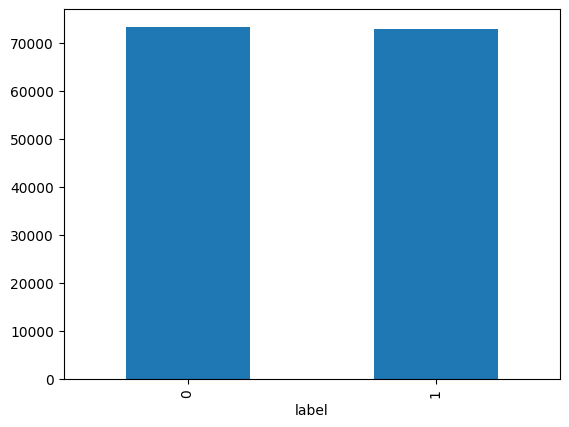

In [73]:
train_data['label'].value_counts().plot(kind = 'bar')


앞서 확인하였듯이 약 146,000개의 영화 리뷰 샘플이 존재하는데 그래프 상으로 긍정과 부정 둘 다 약 72,000개의 샘플이 존재하여 레이블의 분포가 균일한 것처럼 보입니다. 정확하게 몇 개인지 확인해봅시다.

In [74]:
print(train_data.groupby('label').size().reset_index(name = 'count'))


   label  count
0      0  73342
1      1  72841


레이블이 0인 리뷰가 근소하게 많습니다. 리뷰 중에 Null 값을 가진 샘플이 있는지 확인합니다.

In [75]:
print(train_data.isnull().values.any())


True


True가 나왔다면 데이터 중에 Null 값을 가진 샘플이 존재한다는 의미입니다. 어떤 열에 존재하는지 확인해봅시다.

In [76]:
print(train_data.isnull().sum())


id          0
document    1
label       0
dtype: int64


리뷰가 적혀있는 document 열에서 Null 값을 가진 샘플이 총 1개가 존재한다고 합니다. 그렇다면 document 열에서 Null 값이 존재한다는 것을 조건으로 Null 값을 가진 샘플이 어느 인덱스의 위치에 존재하는지 한 번 출력해봅시다.

In [77]:
train_data.loc[train_data.document.isnull()]


,id,document,label
25857,2172111,NaN,1


출력 결과는 위와 같습니다. Null 값을 가진 샘플을 제거하겠습니다.

In [78]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인


False


Null 값을 가진 샘플이 제거되었습니다. 다시 샘플의 개수를 출력하여 1개의 샘플이 제거되었는지 확인해봅시다.

In [79]:
print(len(train_data))


146182


데이터의 전처리를 수행해보겠습니다. 위의 train_data와 test_data에서 온점(.)이나 ?와 같은 각종 특수문자가 사용된 것을 확인했습니다. train_data로부터 한글만 남기고 제거하기 위해서 정규 표현식을 사용해보겠습니다.

우선 영어를 예시로 정규 표현식을 설명해보겠습니다. 영어의 알파벳들을 나타내는 정규 표현식은 [a-zA-Z]입니다. 이 정규 표현식은 영어의 소문자와 대문자들을 모두 포함하고 있는 정규 표현식으로 이를 응용하면 영어에 속하지 않는 구두점이나 특수문자를 제거할 수 있습니다. 예를 들어 알파벳과 공백을 제외하고 모두 제거하는 전처리를 수행하는 예제는 다음과 같습니다.

In [80]:
#알파벳과 공백을 제외하고 모두 제거
eng_text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-Z ]', '', eng_text))


do you expect people to read the FAQ etc and actually accept hard atheism


위와 같은 원리를 한국어 데이터에 적용하고 싶다면, 우선 한글을 범위 지정할 수 있는 정규 표현식을 찾아내면 되겠습니다. 우선 자음과 모음에 대한 범위를 지정해보겠습니다. 일반적으로 자음의 범위는 ㄱ ~ ㅎ, 모음의 범위는 ㅏ ~ ㅣ와 같이 지정할 수 있습니다. 해당 범위 내에 어떤 자음과 모음이 속하는지 알고 싶다면 아래의 링크를 참고하시기 바랍니다.

링크 : https://www.unicode.org/charts/PDF/U3130.pdf
ㄱ ~ ㅎ: 3131 ~ 314E
ㅏ ~ ㅣ: 314F ~ 3163

완성형 한글의 범위는 가 ~ 힣과 같이 사용합니다. 해당 범위 내에 포함된 음절들은 아래의 링크에서 확인할 수 있습니다.

링크 : https://www.unicode.org/charts/PDF/UAC00.pdf

위 범위 지정을 모두 반영하여 train_data에 한글과 공백을 제외하고 모두 제거하는 정규 표현식을 수행해봅시다.

In [81]:
# 한글과 공백을 제외하고 모두 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


상위 5개의 샘플을 다시 출력해보았는데, 정규 표현식을 수행하자 기존의 공백. 즉, 띄어쓰기는 유지되면서 온점과 같은 구두점 등은 제거되었습니다. 사실 네이버 영화 리뷰는 한글이 아니더라도 영어, 숫자, 특수문자로도 리뷰를 업로드할 수 있습니다. 다시 말해 기존에 한글이 없는 리뷰였다면 더 이상 아무런 값도 없는 빈(empty) 값이 되었을 것입니다. train_data에 공백(whitespace)만 있거나 빈 값을 가진 행이 있다면 Null 값으로 변경하도록 하고, Null 값이 존재하는지 확인해보겠습니다.

In [82]:
train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())


id            0
document    391
label         0
dtype: int64


<ipython-input-82-c2f9538d5bc3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['document'].replace('', np.nan, inplace=True)


Null 값이 789개나 새로 생겼습니다. Null 값이 있는 행을 5개만 출력해볼까요?

In [83]:
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
584,7117896,NaN,0
593,6478189,NaN,0
638,9364602,NaN,0
668,1600635,NaN,0
1559,6918082,NaN,1


Null 샘플들은 레이블이 긍정일 수도 있고, 부정일 수도 있습니다. 아무런 의미도 없는 데이터므로 제거해줍니다.

In [84]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))


145791


샘플 개수가 또 다시 줄어서 145,393개가 남았습니다. 테스트 데이터에 앞서 진행한 전처리 과정을 동일하게 진행합니다.

In [85]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))


전처리 후 테스트용 샘플의 개수 : 49157


<ipython-input-85-c182d8fa0991>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경


#### 4-1-3) 토큰화

토큰화를 진행해봅시다. 토큰화 과정에서 불용어를 제거하겠습니다. 불용어는 정의하기 나름인데, 한국어의 조사, 접속사 등의 보편적인 불용어를 사용할 수도 있겠지만 결국 풀고자 하는 문제의 데이터를 지속 검토하면서 계속해서 추가하는 경우 또한 많습니다. 실제 현업인 상황이라면 일반적으로 아래의 불용어보다 더 많은 불용어를 사용할 수 있습니다.

In [86]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']


여기서는 위 정도로만 불용어를 정의하고, 토큰화를 위한 형태소 분석기는 KoNLPy의 Mecab을 사용합니다. Mecab을 복습해봅시다.

In [87]:
mecab = Mecab()
mecab.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔')



['와',
 '이런',
 '것',
 '도',
 '영화',
 '라고',
 '차라리',
 '뮤직',
 '비디오',
 '를',
 '만드',
 '는',
 '게',
 '나을',
 '뻔']

한국어을 토큰화할 때는 영어처럼 띄어쓰기 기준으로 토큰화를 하는 것이 아니라, 주로 형태소 분석기를 사용한다고 언급한 바 있습니다. train_data에 형태소 분석기를 사용하여 토큰화를 하면서 불용어를 제거하여 X_train에 저장합니다.

In [88]:
X_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)


100%|██████████| 145791/145791 [00:16<00:00, 8931.00it/s] 


상위 3개의 샘플만 출력하여 결과를 확인해봅시다.

In [89]:
print(X_train[:3])


[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '않', '구나'], ['너무', '재', '밓었다그래서보는것을추천한다']]


토큰화가 진행된 것을 볼 수 있습니다. 테스트 데이터에 대해서도 동일하게 토큰화를 해줍니다.

In [90]:
X_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)


100%|██████████| 49157/49157 [00:06<00:00, 7574.70it/s]


지금까지 훈련 데이터와 테스트 데이터에 대해서 텍스트 전처리를 진행해보았습니다. 이제 학습 데이터와 검증 데이터, 그리고 테스트 데이터를 준비해보겠습니다.

#### 4-1-4) 학습 데이터, 검증 데이터, 테스트 데이터

이미 학습 데이터와 테스트 데이터는 준비되었지만 학습하는 동안의 성능 평가를 진행할 검증 데이터가 추가로 필요합니다. 데이터프레임의 레이블 열을 별도로 분리하여 y_train과 y_test로 저장해줍니다. 이제 학습 데이터는 X_train, y_train에 저장되고, 테스트 데이터는 X_test, y_test에 저장이 될 것입니다.

학습 데이터 중에서 20%를 분할하여 추가로 검증 데이터를 만들어줍니다. 머신 러닝 문제를 풀 때, 데이터의 분리는 주로 사이킷런에서 제공하는 train_test_split을 사용해 진행합니다. test_size에 비율을 넣어주면 기존 데이터에 대해서 해당 비율만큼 일부 데이터를 분할하여 반환합니다.

랜덤으로 분할하는 과정에서 레이블 불균형이 발생하지 않도록, 레이블의 균형 비율을 유지하면서 분할하고 싶다면 분할 시 기존 데이터의 y데이터를 stratify의 값으로 사용하면 됩니다.

In [91]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)


실제로 비율이 잘 유지되면서 분할되었는지 확인해봅시다.

In [92]:
print('--------학습 데이터의 비율-----------')
print(f'부정 리뷰 = {round(np.sum(y_train==0)/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(np.count_nonzero(y_train)/len(y_train) * 100,3)}%')

print('--------검증 데이터의 비율-----------')
print(f'부정 리뷰 = {round(np.sum(y_valid==0)/len(y_valid) * 100,3)}%')
print(f'긍정 리뷰 = {round(np.count_nonzero(y_valid)/len(y_valid) * 100,3)}%')

print('--------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(np.sum(y_test==0)/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(np.count_nonzero(y_test)/len(y_test) * 100,3)}%')


--------학습 데이터의 비율-----------
부정 리뷰 = 50.179%
긍정 리뷰 = 49.821%
--------검증 데이터의 비율-----------
부정 리뷰 = 50.18%
긍정 리뷰 = 49.82%
--------테스트 데이터의 비율-----------
부정 리뷰 = 49.73%
긍정 리뷰 = 50.27%


분할 후에도 학습 데이터와 검증 데이터의 레이블 비율이 동일한 것을 확인할 수 있습니다.

#### 4-1-5) 단어 집합 만들기

In [93]:
word_list = []
for sent in X_train:
    for word in sent:
      word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))


총 단어수 : 45322


In [94]:
print('훈련 데이터에서의 단어 영화의 등장 횟수 :', word_counts['영화'])
print('훈련 데이터에서의 단어 공감의 등장 횟수 :', word_counts['공감'])


훈련 데이터에서의 단어 영화의 등장 횟수 : 45806
훈련 데이터에서의 단어 공감의 등장 횟수 : 785


In [95]:
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('등장 빈도수 상위 10개 단어')
print(vocab[:10])


등장 빈도수 상위 10개 단어
['영화', '보', '있', '없', '좋', '나', '었', '만', '는데', '너무']


In [96]:
threshold = 3
total_cnt = len(word_counts) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 45322
등장 빈도가 2번 이하인 희귀 단어의 수: 26122
단어 집합에서 희귀 단어의 비율: 57.636467940514535
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.2671991832077114


In [97]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
vocab_size = total_cnt - rare_cnt
vocab = vocab[:vocab_size]
print('단어 집합의 크기 :', len(vocab))


단어 집합의 크기 : 19200


In [98]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab) :
  word_to_index[word] = index + 2


In [99]:
print('단어 <PAD>와 맵핑되는 정수 :', word_to_index['<PAD>'])
print('단어 <UNK>와 맵핑되는 정수 :', word_to_index['<UNK>'])
print('단어 영화와 맵핑되는 정수 :', word_to_index['영화'])

단어 <PAD>와 맵핑되는 정수 : 0
단어 <UNK>와 맵핑되는 정수 : 1
단어 영화와 맵핑되는 정수 : 2


#### 4-1-6) 정수 인코딩

In [100]:
def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

encoded_X_train = texts_to_sequences(X_train, word_to_index)
encoded_X_valid = texts_to_sequences(X_valid, word_to_index)
encoded_X_test = texts_to_sequences(X_test, word_to_index)


In [101]:
# 상위 샘플 2개 출력
for sent in encoded_X_train[:2]:
  print(sent)

[378, 411, 28, 45, 180, 2656, 10, 84, 9, 94, 3, 35, 93, 63]
[2422, 1918, 3778, 516, 1304, 737, 76, 84, 37, 2422, 842, 11882]


In [102]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [103]:
decoded_sample = [index_to_word[word] for word in encoded_X_train[0]]
print('기존의 첫번째 샘플 :', X_train[0])
print('복원된 첫번째 샘플 :', decoded_sample)

기존의 첫번째 샘플 : ['나름', '신선', '했', '던', '연출', '돋보였', '는데', '년', '만', '다시', '보', '되', '니', '감동']
복원된 첫번째 샘플 : ['나름', '신선', '했', '던', '연출', '돋보였', '는데', '년', '만', '다시', '보', '되', '니', '감동']


#### 4-1-7) 패딩

리뷰의 최대 길이 : 74
리뷰의 평균 길이 : 12.277445298031415


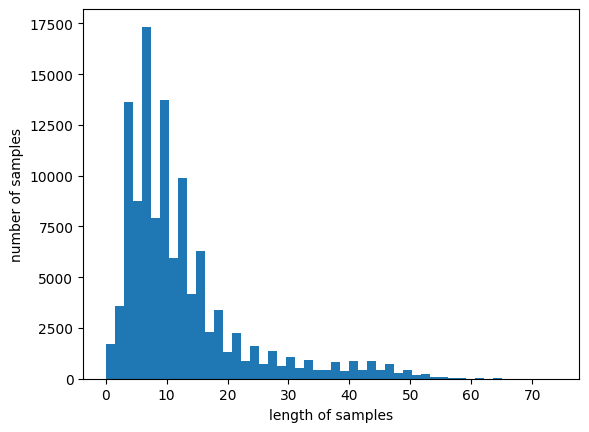

In [104]:
print('리뷰의 최대 길이 :',max(len(review) for review in encoded_X_train))
print('리뷰의 평균 길이 :',sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [105]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [106]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 92.50977433294464


In [107]:
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

padded_X_train = pad_sequences(encoded_X_train, max_len=max_len)
padded_X_valid = pad_sequences(encoded_X_valid, max_len=max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len=max_len)

print('훈련 데이터의 크기 :', padded_X_train.shape)
print('검증 데이터의 크기 :', padded_X_valid.shape)
print('테스트 데이터의 크기 :', padded_X_test.shape)

훈련 데이터의 크기 : (116632, 30)
검증 데이터의 크기 : (29159, 30)
테스트 데이터의 크기 : (49157, 30)


In [108]:
print('첫번째 샘플의 길이 :', len(padded_X_train[0]))
print('첫번째 샘플 :', padded_X_train[0])

첫번째 샘플의 길이 : 30
첫번째 샘플 : [ 378  411   28   45  180 2656   10   84    9   94    3   35   93   63
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


### 4-2) LSTM을 이용한 네이버 영화 리뷰 분류 모델


이제 딥 러닝 프레임워크 PyTorch를 이용하여 LSTM 모델을 구현해봅시다.

In [109]:
import torch
import torch.nn as nn
import torch.nn.functional as F

현재 실습 환경에서 GPU를 사용 가능한지 확인합니다

In [110]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("cpu와 cuda 중 다음 기기로 학습함:", device)

cpu와 cuda 중 다음 기기로 학습함: cpu


저자의 경우 Colab에서 GPU를 선택하여 실습을 진행하여 cuda라는 출력 결과를 확인했습니다. 레이블 데이터를 파이토치의 텐서 타입으로 변환합니다. 이후 훈련 데이터의 상위 5개의 레이블을 출력해보았습니다.

In [ ]:
train_label_tensor = torch.tensor(np.array(y_train))
valid_label_tensor = torch.tensor(np.array(y_valid))
test_label_tensor = torch.tensor(np.array(y_test))
print(train_label_tensor[:5])

tensor([1, 0, 0, 1, 0])


이제 LSTM 모델을 클래스로 구현해봅시다. 각 층을 지날 때마다 각 층의 출력의 크기를 이해하는 것이 중요합니다. 예를 들어 입력은 (배치 크기, 문장 길이)의 크기를 가지는 텐서입니다. 임베딩 층을 지나고 나면 각 단어가 임베딩 벡터로 변환되면서 (배치 크기, 문장 길이, 임베딩 벡터의 차원)으로 텐서의 크기가 변환됩니다.

이 후 LSTM의 마지막 시점의 은닉 상태(hidden state) 값을 출력층과 연결시키는 작업을 해주어야 합니다. 이때 LSTM이 출력층으로 보는 결과값의 차원은 (배치 크기, 은닉 상태의 차원)을 가져야 합니다. 마지막 시점의 은닉 상태의 값만 전달하므로 은닉 상태는 모든 시점(문장 길이)만큼 존재하는 것이 아니라 단 하나만 있습니다. 출력층은 지난 결과는 소프트맥스 회귀를 수행하므로 (배치 크기, 분류하고자하는 카테고리의 수)의 차원을 가지게 됩니다.

그 후 각 데이터를 배치 단위로 데이터 묶음을 꺼낼 수 있는 데이터로더로 전달합니다. 정리하면 다음과 같습니다. 아직 모델을 만들지는 않았지만, 단어 벡터의 차원을 100, 배치 크기를 32, 문장 길이를 500(패딩 후), LSTM의 은닉 상태의 차원을 128로 한다고 가정해보겠습니다.

- 단어 벡터의 차원 = 100
- 문장 길이 = 500
- 배치 크기 = 32
- 데이터 개수 = 2만
- LSTM의 은닉층의 크기 = 128
- 분류하고자 하는 카테고리 개수 = 2개

위의 정보들을 고려하였을 때 모델 내부에서 데이터의 변화는 다음과 같습니다.

- (32, 500) => 입력 데이터의 형태 => 임베딩 층 통과 후 => (32, 500, 100) => LSTM 통과 후 => (32, 128) => Softmax 출력층 통과 후 => (32, 2)

In [ ]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        #self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x: (batch_size, seq_length)
        embedded = self.embedding(x)  # (batch_size, seq_length, embedding_dim)

        # LSTM은 (hidden state, cell state)의 튜플을 반환합니다
        lstm_out, (hidden, cell) = self.lstm(embedded)  # lstm_out: (batch_size, seq_length, hidden_dim), hidden: (1, batch_size, hidden_dim)

        last_hidden = hidden.squeeze(0)  # (batch_size, hidden_dim)
        logits = self.fc(last_hidden)  # (batch_size, output_dim)
        return logits#self.sigmoid(logits)


훈련 데이터, 검증 데이터, 테스트 데이터에 대해서 파이토치 텐서로 변환하고 배치 단위 연산을 위해 데이터로더로 변환합니다.

In [ ]:
encoded_train = torch.tensor(padded_X_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(padded_X_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=1)

encoded_valid = torch.tensor(padded_X_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=1)


In [ ]:
aa = nn.Embedding(vocab_size, embedding_dim=100)

aa.weight

#encoded_train[:3]
aa_result = aa(encoded_train[:3])
# aa(encoded_train[:3]).shape

In [ ]:
aa2 = nn.LSTM(100, 128, batch_first=True)
lstm_out, (hidden,cell) = aa2(aa_result)
hidden.shape
last_hidden = hidden.squeeze(0)

In [ ]:
aa3 = nn.Linear(128, 2)
aa3(last_hidden)

tensor([[0.0761, 0.0813],
        [0.0760, 0.0808],
        [0.0744, 0.0805]], grad_fn=<AddmmBackward0>)

In [ ]:
vocab_size

19200

훈련 데이터의 샘플 개수가 116,314개 였으므로 배치 크기를 32로 할 경우에는 116,324/32=3,635 다시 말해 32개씩 묶인 데이터 묶음이 3,635개가 생깁니다. 그리고 학습 시에는 32개씩 데이터가 들어가게 될 것입니다.

In [ ]:
total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))


총 배치의 수 : 3645


모델 객체를 선언합니다.

In [ ]:
embedding_dim = 100
hidden_dim = 128
output_dim = 2
learning_rate = 0.01
num_epochs = 10

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model.to(device)


TextClassifier(
  (embedding): Embedding(19200, 100)
  (lstm): LSTM(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

임베딩 벡터의 차원은 128, 출력층의 크기(분류해야 할 카테고리의 개수)는 2로 정했습니다. 이렇게 사용자가 정해주는 값이면서 모델의 결과에 영향을 미치는 값들을 하이퍼파라미터라고 합니다. 소프트맥스 회귀를 통해 분류 문제를 진행하므로 손실 함수는 nn.CrossEntropyLoss()를 사용합니다. 파이토치로 자연어 처리를 하게 되면 가장 많이 사용하게 되는 손실 함수입니다. 하이퍼파라미터 중 하나인 학습률(learning rate)는 0.001로 정했습니다.

In [ ]:
criterion = nn.CrossEntropyLoss() # nn.BCELoss()#
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### 4-3) 평가 코드 작성

이후 평가를 진행하기 위해서 모델의 정확도를 측정하는 함수 calculate_accuracy()를 작성합니다.

In [ ]:
def calculate_accuracy(logits, labels):
    # _, predicted = torch.max(logits, 1)
    predicted = torch.argmax(logits, dim=1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

검증 데이터와 테스트 데이터에 대한 성능을 측정하기 위한 함수 evaluate()를 작성합니다. 아래의 함수에서 model.eval()과 with torch.no_grad()를 짚어봅시다. 이 두 개는 모델 평가를 수행할 때 중요한 역할을 합니다. 각각의 의미는 다음과 같습니다.

- model.eval(): 모델을 평가 모드로 설정합니다. 이렇게 하면 모델 내부의 모든 레이어에 대해 평가 모드가 활성화됩니다. 일부 레이어, 예를 들어 드롭아웃이나 배치 정규화는 학습과 평가 시 다르게 동작하기 때문에 이 설정이 중요합니다. 평가 모드가 설정되지 않으면, 이러한 레이어의 동작이 올바르지 않을 수 있으며, 이로 인해 평가 결과가 제대로 나오지 않을 수 있습니다.

- with torch.no_grad(): 이 문장은 자동 미분 엔진에서 그래디언트 계산을 비활성화합니다. 평가 중에는 기울기를 계산할 필요가 없으므로, 이렇게 설정하면 메모리를 절약하고 속도를 높일 수 있습니다. 만약 이 설정이 적용되지 않으면, 평가 과정에서 그래디언트가 계산되고 메모리를 차지하게 됩니다. 그러나 평가 결과 자체에는 직접적인 영향을 주지 않습니다.

따라서 model.eval()은 평가 시 반드시 사용해야 하며, 그렇지 않으면 평가 결과가 올바르게 나오지 않을 수 있습니다. with torch.no_grad():는 필수는 아니지만, 메모리와 속도 측면에서 권장됩니다.

In [ ]:
def evaluate(model, valid_dataloader, criterion, device):
    val_loss = 0
    val_correct = 0
    val_total = 0

    model.eval()
    with torch.no_grad():
        # 데이터로더로부터 배치 크기만큼의 데이터를 연속으로 로드
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # 모델의 예측값
            logits = model(batch_X)

            # 손실을 계산
            loss = criterion(logits, batch_y)

            # 정확도와 손실을 계산함
            val_loss += loss.item()
            val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
            val_total += batch_y.size(0)

    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_accuracy

### 4-4) 학습

In [ ]:
num_epochs = 5

# Training loop
best_val_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    # Training
    train_loss = 0
    train_correct = 0
    train_total = 0
    model.train()
    for batch_X, batch_y in train_dataloader:
        # Forward pass
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        # batch_X.shape == (batch_size, max_len)
        logits = model(batch_X)

        # Compute loss
        loss = criterion(logits, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate training accuracy and loss
        train_loss += loss.item()
        train_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
        train_total += batch_y.size(0)

    train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)

    # Validation
    val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # 검증 손실이 최소일 때 체크포인트 저장
    if val_loss < best_val_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')

### 4-5) 모델 로드 및 평가

In [ ]:
# 모델 로드
model.load_state_dict(torch.load('best_model_checkpoint.pth'))

# 모델을 device에 올립니다.
model.to(device)


In [ ]:
# 검증 데이터에 대한 정확도와 손실 계산
val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')


In [ ]:
# 테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')


4-6) 모델 테스트

In [ ]:
index_to_tag = {0 : '부정', 1 : '긍정'}

def predict(text, model, word_to_index, index_to_tag):
    # Set the model to evaluation mode
    model.eval()

    # Tokenize the input text
    tokens = mecab.morphs(text) # 토큰화
    tokens = [word for word in tokens if not word in stopwords] # 불용어 제거
    token_indices = [word_to_index.get(token, 1) for token in tokens]

    # Convert tokens to tensor
    input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)  # (1, seq_length)

    # Pass the input tensor through the model
    with torch.no_grad():
        logits = model(input_tensor)  # (1, output_dim)

    # Get the predicted class index
    predicted_index = torch.argmax(logits, dim=1)

    # Convert the predicted index to its corresponding tag
    predicted_tag = index_to_tag[predicted_index.item()]

    return predicted_tag


In [ ]:
test_input = "이 영화 개꿀잼 ㅋㅋㅋ"
predict(test_input, model, word_to_index, index_to_tag)


In [ ]:
test_input = "이딴게 영화냐 ㅉㅉ"
predict(test_input, model, word_to_index, index_to_tag)


In [ ]:
test_input = "감독 뭐하는 놈이냐?"
predict(test_input, model, word_to_index, index_to_tag)


In [ ]:
test_input = "와 개쩐다 정말 세계관 최강자들의 영화다"
predict(test_input, model, word_to_index, index_to_tag)


### Seq2Seq를 이용한 기계번역 1 - Toy example

- 주의: 데이터가 극도로 적고, 학습 에폭도 작아, 실제 번역 성능은 의미가 없습니다. “Seq2Seq 파이프라인이 어떻게 동작하는가”를 확인하는 용도입니다.


In [113]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# ------------------------------------------------
# 1. Toy Parallel Corpus (영어 -> 스페인어 예시)
#    실제로는 훨씬 큰 병렬 데이터셋 필요
# ------------------------------------------------
english_sentences = [
    "i am a student",
    "you are a teacher",
    "he is a doctor",
    "she is a nurse",
    "they are students"
]

# 스페인어 문장 (단순 매칭 예시)
spanish_sentences = [
    "yo soy un estudiante",
    "tu eres un maestro",
    "el es un doctor",
    "ella es una enfermera",
    "ellos son estudiantes"
]

# ------------------------------------------------
# 2. 토큰화 & 특수 토큰 정의
# ------------------------------------------------
def tokenize(sentence):
    return sentence.lower().split()

SOS_TOKEN = "<sos>"
EOS_TOKEN = "<eos>"
PAD_TOKEN = "<pad>"
UNK_TOKEN = "<unk>"  # 사전에 없는 단어용 토큰

# ------------------------------------------------
# 3. 어휘 사전(Vocabulary) 구축
#    - 영어, 스페인어 각각 별도 vocab 구성
#    - <unk> 토큰을 포함해, OOV(Out Of Vocabulary) 처리
# ------------------------------------------------
def build_vocab(sentences):
    tokens = set()
    for s in sentences:
        tokens.update(tokenize(s))
    # 토큰 집합에 특수 토큰들 추가
    vocab_list = [PAD_TOKEN, SOS_TOKEN, EOS_TOKEN, UNK_TOKEN] + sorted(list(tokens))
    word2idx = {w: i for i, w in enumerate(vocab_list)}
    idx2word = {i: w for i, w in enumerate(vocab_list)}
    return word2idx, idx2word

en_word2idx, en_idx2word = build_vocab(english_sentences)
es_word2idx, es_idx2word = build_vocab(spanish_sentences)

en_vocab_size = len(en_word2idx)
es_vocab_size = len(es_word2idx)

print("English vocab size:", en_vocab_size)
print("Spanish vocab size:", es_vocab_size)

# ------------------------------------------------
# 4. Dataset 정의
#    - (영어 입력 텐서, 스페인어 목표 텐서) 반환
# ------------------------------------------------
class TranslationDataset(Dataset):
    def __init__(self, source_sentences, target_sentences,
                 source_w2i, target_w2i, max_len=10):
        self.source_sentences = source_sentences
        self.target_sentences = target_sentences
        self.source_w2i = source_w2i
        self.target_w2i = target_w2i
        self.max_len = max_len

    def __len__(self):
        return len(self.source_sentences)

    def __getitem__(self, idx):
        # 1) 원문/타겟 문장
        en_sent = self.source_sentences[idx]
        es_sent = self.target_sentences[idx]

        # 2) 토큰화
        en_tokens = tokenize(en_sent)
        es_tokens = tokenize(es_sent)

        # 3) 스페인어 문장 끝에 <eos> 추가
        es_tokens = es_tokens + [EOS_TOKEN]

        # 4) 정수 인덱스 변환 (없는 단어는 <unk>로)
        en_ids = [self.source_w2i.get(w, self.source_w2i[UNK_TOKEN]) for w in en_tokens]
        es_ids = [self.target_w2i.get(w, self.target_w2i[UNK_TOKEN]) for w in es_tokens]

        # 5) 길이 맞춰서 패딩
        en_ids = en_ids[:self.max_len]
        es_ids = es_ids[:self.max_len]

        en_len = len(en_ids)
        es_len = len(es_ids)

        if en_len < self.max_len:
            en_ids += [self.source_w2i[PAD_TOKEN]] * (self.max_len - en_len)
        if es_len < self.max_len:
            es_ids += [self.target_w2i[PAD_TOKEN]] * (self.max_len - es_len)

        # 디코더 입력: <sos> + es_ids[:-1]
        decoder_input = [self.target_w2i[SOS_TOKEN]] + es_ids[:-1]
        # 혹시 decoder_input이 max_len+1 길이가 될 수 있으니 슬라이싱
        decoder_input = decoder_input[:self.max_len]

        # 다시 패딩 처리 (만약 decoder_input이 짧아졌다면)
        if len(decoder_input) < self.max_len:
            decoder_input += [self.target_w2i[PAD_TOKEN]] * (self.max_len - len(decoder_input))

        return {
            "encoder_input": torch.tensor(en_ids, dtype=torch.long),
            "decoder_input": torch.tensor(decoder_input, dtype=torch.long),
            "decoder_target": torch.tensor(es_ids, dtype=torch.long)
        }

# ------------------------------------------------
# 5. DataLoader
# ------------------------------------------------
dataset = TranslationDataset(
    english_sentences, spanish_sentences,
    en_word2idx, es_word2idx, max_len=8
)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# ------------------------------------------------
# 6. Seq2Seq 모델 정의 (간단 버전, Attention 미적용)
# ------------------------------------------------
class Encoder(nn.Module):
    def __init__(self, input_dim, embed_dim, hidden_dim):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(input_dim, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)

    def forward(self, x):
        # x: (batch_size, seq_len)
        embedded = self.embedding(x)
        outputs, (hidden, cell) = self.lstm(embedded)
        return hidden, cell

class Decoder(nn.Module):
    def __init__(self, output_dim, embed_dim, hidden_dim):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(output_dim, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, hidden, cell):
        # x: (batch_size, seq_len)
        embedded = self.embedding(x)
        outputs, (hidden, cell) = self.lstm(embedded, (hidden, cell))
        logits = self.fc(outputs)  # (batch_size, seq_len, output_dim)
        return logits, hidden, cell

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, encoder_input, decoder_input):
        # 인코더
        hidden, cell = self.encoder(encoder_input)
        # 디코더
        logits, hidden, cell = self.decoder(decoder_input, hidden, cell)
        return logits

# ------------------------------------------------
# 7. 모델 초기화
# ------------------------------------------------
embed_dim = 16
hidden_dim = 32

encoder = Encoder(input_dim=en_vocab_size, embed_dim=embed_dim, hidden_dim=hidden_dim)
decoder = Decoder(output_dim=es_vocab_size, embed_dim=embed_dim, hidden_dim=hidden_dim)
model = Seq2Seq(encoder, decoder)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss(ignore_index=es_word2idx[PAD_TOKEN])
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ------------------------------------------------
# 8. 학습 루프
# ------------------------------------------------
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for batch in dataloader:
        enc_in = batch["encoder_input"].to(device)     # (batch, seq_len)
        dec_in = batch["decoder_input"].to(device)     # (batch, seq_len)
        dec_tg = batch["decoder_target"].to(device)    # (batch, seq_len)

        optimizer.zero_grad()
        output = model(enc_in, dec_in)  # (batch, seq_len, es_vocab_size)

        # (batch*seq_len, vocab_size) vs (batch*seq_len)
        output_reshaped = output.view(-1, es_vocab_size)
        dec_tg_reshaped = dec_tg.view(-1)

        loss = criterion(output_reshaped, dec_tg_reshaped)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f"[Epoch {epoch+1}/{num_epochs}] Loss: {avg_loss:.4f}")

print("Training complete!\n")

# ------------------------------------------------
# 9. 추론(Decoding) 함수
# ------------------------------------------------
def translate(model, sentence, max_len=8):
    model.eval()

    # 1) 인코더 입력 준비
    tokens = tokenize(sentence)
    en_ids = [en_word2idx.get(t, en_word2idx[UNK_TOKEN]) for t in tokens]
    en_ids = en_ids[:max_len]
    en_len = len(en_ids)
    if en_len < max_len:
        en_ids += [en_word2idx[PAD_TOKEN]]*(max_len - en_len)

    encoder_input = torch.tensor([en_ids], dtype=torch.long).to(device)

    # 2) 인코더 실행
    with torch.no_grad():
        hidden, cell = model.encoder(encoder_input)

    # 3) 디코더 초기 입력: <sos>
    dec_input = torch.tensor([[es_word2idx[SOS_TOKEN]]], dtype=torch.long).to(device)

    output_tokens = []

    # 4) step-by-step 디코딩
    for _ in range(max_len):
        with torch.no_grad():
            logits, hidden, cell = model.decoder(dec_input, hidden, cell)

        # 마지막 시점의 로짓
        pred = logits[:, -1, :]  # (1, vocab_size)
        pred_id = torch.argmax(pred, dim=-1).item()

        if pred_id == es_word2idx[EOS_TOKEN]:
            # <eos> => 번역 종료
            break
        if pred_id == es_word2idx[PAD_TOKEN]:
            # <pad> => 더 이상 유효 토큰 없음
            break

        output_tokens.append(pred_id)

        # 다음 입력에 pred_id를 추가
        new_input = torch.cat([dec_input, torch.tensor([[pred_id]]).to(device)], dim=1)
        dec_input = new_input

    # 5) 정수 -> 단어
    translated_words = [es_idx2word[idx] for idx in output_tokens]
    return " ".join(translated_words)

# ------------------------------------------------
# 10. 테스트 문장
#     (기존 데이터에 없는 "doctors" 단어 포함)
# ------------------------------------------------
test_sentences = [
    "i am a teacher",
    "he is a student",
    "they are doctors"
]

for s in test_sentences:
    translation = translate(model, s)
    print(f"English: {s}  ->  Spanish(pred): {translation}")


English vocab size: 18
Spanish vocab size: 20
[Epoch 1/10] Loss: 3.0151
[Epoch 2/10] Loss: 2.9992
[Epoch 3/10] Loss: 2.9858
[Epoch 4/10] Loss: 2.9579
[Epoch 5/10] Loss: 2.9503
[Epoch 6/10] Loss: 2.9280
[Epoch 7/10] Loss: 2.9189
[Epoch 8/10] Loss: 2.9092
[Epoch 9/10] Loss: 2.8952
[Epoch 10/10] Loss: 2.8708
Training complete!

English: i am a teacher  ->  Spanish(pred): ellos ellos ellos ellos ellos ellos ellos ellos
English: he is a student  ->  Spanish(pred): ellos ellos ellos ellos ellos ellos ellos ellos
English: they are doctors  ->  Spanish(pred): ellos ellos ellos ellos ellos ellos ellos ellos


### Seq2Seq를 이용한 기계번역 2

seq2seq를 이용해서 기계 번역기를 만들어보겠습니다. 실제 서비스에 사용되는 번역기는 뒤의 챕터에서 배우게 될 어텐션 메커니즘을 사용해야 하고, 최소 수백만 개의 데이터가 필요합니다. 하지만 그럼에도 번역기를 만드는 간단한 토이 프로젝트를 사용해서 seq2seq 구조와 인코더와 디코더의 역할을 이해할 수 있습니다.

### 5-3-1) 데이터 로드 및 전처리

실제 성능이 좋은 기계 번역기를 구현하려면 방대한 데이터가 필요하므로 여기서는 seq2seq를 간단히 실습해보는 수준의 간단한 기계 번역기를 구현해보겠습니다. 기계 번역기를 훈련시키기 위해서는 훈련 데이터로 병렬 코퍼스(parallel corpus)가 필요합니다. 병렬 코퍼스란, 두 개 이상의 언어가 병렬적으로 구성된 코퍼스를 의미합니다.

링크 : http://www.manythings.org/anki

이번 실습에서는 프랑스어-영어 병렬 코퍼스인 fra-eng.zip 파일을 사용합니다. 위의 링크에서 해당 파일을 다운받은 후 압축을 풀면 fra.txt라는 파일을 얻을 수 있는데 해당 파일을이 실습에서 사용합니다.

병렬 코퍼스 데이터에 대해서 이해해봅시다. 병렬 데이터라고 하면 앞서 수행한 태깅 작업 챕터의 개체명 인식과 같은 데이터를 생각할 수 있지만, 앞서 수행한 태깅 작업의 병렬 데이터와 seq2seq가 사용하는 병렬 데이터는 성격이 다릅니다. 태깅 작업의 병렬 데이터는 쌍이 되는 데이터와 레이블이 길이가 동일하였으나 여기서는 쌍이 된다고 해서 반드시 길이가 같지는 않습니다.

실제 번역기를 생각해보면 구글 번역기에 '나는 학생이다.'라는 토큰의 개수가 2인 문장을 넣었을 때 'I am a student.'라는 토큰의 개수가 4인 문장이 나오는 것과 같은 이치입니다. seq2seq는 기본적으로 입력 시퀀스와 출력 시퀀스의 길이가 다를 수 있다고 가정합니다. 지금 구현 예제는 기계 번역기이지만 seq2seq로 구현할 수 있는 또 다른 예제인 챗봇을 만든다고 가정해보면, 대답의 길이가 질문의 길이와 항상 똑같아야 한다고하면 그 또한 이상합니다. 여기서 사용할 fra.txt 데이터는 아래와 같이 왼쪽의 영어 문장과 오른쪽의 프랑스어 문장 사이에 탭으로 구분되는 형식이 하나의 샘플입니다.

```
Watch me.           Regardez-moi !
```

데이터는 위와 동일한 형식의 약 19만개의 병렬 문장 샘플을 포함하고 있습니다. 데이터를 읽고 전처리를 진행해보겠습니다. 앞으로의 코드에서 src는 source의 줄임말로 입력 문장을 나타내며, tar는 target의 줄임말로 번역하고자 하는 문장을 나타냅니다.

In [ ]:
import re
import os
import unicodedata
import urllib3
import zipfile
import shutil
import numpy as np
import pandas as pd
import torch
from collections import Counter
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset


이번 실습에서는 약 19만개의 데이터 중 33,000개의 샘플만을 사용할 예정입니다.

In [ ]:
num_samples = 33000


fra-eng.zip 파일을 다운로드하고 압축을 풀겠습니다.

In [ ]:
!wget -c http://www.manythings.org/anki/fra-eng.zip && unzip -o fra-eng.zip


전처리 함수들을 구현합니다. 구두점 등을 제거하거나 단어와 구분해주기 위한 전처리입니다.

In [ ]:
def unicode_to_ascii(s):
  # 프랑스어 악센트(accent) 삭제
  # 예시 : 'déjà diné' -> deja dine
  return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')


In [ ]:
def preprocess_sentence(sent):
  # 악센트 삭제 함수 호출
  sent = unicode_to_ascii(sent.lower())

  # 단어와 구두점 사이에 공백을 만듭니다.
  # Ex) "he is a boy." => "he is a boy ."
  sent = re.sub(r"([?.!,¿])", r" \1", sent)

  # (a-z, A-Z, ".", "?", "!", ",") 이들을 제외하고는 전부 공백으로 변환합니다.
  sent = re.sub(r"[^a-zA-Z!.?]+", r" ", sent)

  # 다수 개의 공백을 하나의 공백으로 치환
  sent = re.sub(r"\s+", " ", sent)
  return sent


In [ ]:
def load_preprocessed_data():
  encoder_input, decoder_input, decoder_target = [], [], []

  with open("fra.txt", "r") as lines:
    for i, line in enumerate(lines):
      # source 데이터와 target 데이터 분리
      src_line, tar_line, _ = line.strip().split('\t')

      # source 데이터 전처리
      src_line = [w for w in preprocess_sentence(src_line).split()]

      # target 데이터 전처리
      tar_line = preprocess_sentence(tar_line)
      tar_line_in = [w for w in ("<sos> " + tar_line).split()]
      tar_line_out = [w for w in (tar_line + " <eos>").split()]

      encoder_input.append(src_line)
      decoder_input.append(tar_line_in)
      decoder_target.append(tar_line_out)

      if i == num_samples - 1:
        break

  return encoder_input, decoder_input, decoder_target


구현한 전처리 함수들을 임의의 문장을 입력으로 테스트해봅시다.

In [ ]:
# 전처리 테스트
en_sent = u"Have you had dinner?"
fr_sent = u"Avez-vous déjà diné?"

print('전처리 전 영어 문장 :', en_sent)
print('전처리 후 영어 문장 :',preprocess_sentence(en_sent))
print('전처리 전 프랑스어 문장 :', fr_sent)
print('전처리 후 프랑스어 문장 :', preprocess_sentence(fr_sent))


In [ ]:
sents_en_in, sents_fra_in, sents_fra_out = load_preprocessed_data()


전체 데이터에서 33,000개의 샘플에 대해서 전처리를 수행합니다. 또한 훈련 과정에서 교사 강요(Teacher Forcing)을 사용할 예정이므로, 훈련 시 사용할 디코더의 입력 시퀀스와 실제값. 즉, 레이블에 해당되는 출력 시퀀스를 따로 분리하여 저장합니다. 입력 시퀀스에는 시작을 의미하는 토큰인 를 추가하고, 출력 시퀀스에는 종료를 의미하는 토큰인 를 추가합니다. 이렇게 얻은 3개의 데이터셋 인코더의 입력, 디코더의 입력, 디코더의 레이블을 상위 5개 샘플만 출력해봅시다.

In [ ]:
sents_en_in, sents_fra_in, sents_fra_out = load_preprocessed_data()
print('인코더의 입력 :',sents_en_in[:5])
print('디코더의 입력 :',sents_fra_in[:5])
print('디코더의 레이블 :',sents_fra_out[:5])


모델을 설계하기 전 의아한 점이 있을 수 있습니다. 현재 시점의 디코더 셀의 입력은 오직 이전 디코더 셀의 출력을 입력으로 받는다고 설명하였는데 디코더의 입력에 해당하는 데이터인 sents_fra_in이 왜 필요할까요?

훈련 과정에서는 이전 시점의 디코더 셀의 출력을 현재 시점의 디코더 셀의 입력으로 넣어주지 않고, 이전 시점의 실제값을 현재 시점의 디코더 셀의 입력값으로 하는 방법을 사용할 겁니다. 그 이유는 이전 시점의 디코더 셀의 예측이 틀렸는데 이를 현재 시점의 디코더 셀의 입력으로 사용하면 현재 시점의 디코더 셀의 예측도 잘못될 가능성이 높고 이는 연쇄 작용으로 디코더 전체의 예측을 어렵게 합니다. 이런 상황이 반복되면 훈련 시간이 느려집니다. 만약 이 상황을 원하지 않는다면 이전 시점의 디코더 셀의 예측값 대신 실제값을 현재 시점의 디코더 셀의 입력으로 사용하는 방법을 사용할 수 있습니다. 이와 같이 RNN의 모든 시점에 대해서 이전 시점의 예측값 대신 실제값을 입력으로 주는 방법을 교사 강요라고 합니다.

단어로부터 정수를 얻는 딕셔너리. 즉, 단어 집합(Vocabulary)을 만들어봅시다. 이를 위한 함수로 build_vocab()을 구현합니다. build_vocab은 입력된 데이터로부터 단어의 등장 빈도순으로 정렬 후에 등장 빈도가 높은 순서일 수록 낮은 정수를 부여합니다. 이때, 패딩 토큰을 위한 <PAD> 토큰은 0번, OOV에 대응하기 위한 <UNK> 토큰은 1번에 할당합니다. 이렇게 되면 빈도수가 가장 높은 단어는 정수가 2번, 빈도수가 두번 째로 많은 단어는 정수 3번이 할당됩니다.

In [ ]:
def build_vocab(sents):
  word_list = []

  for sent in sents:
      for word in sent:
        word_list.append(word)

  # 각 단어별 등장 빈도를 계산하여 등장 빈도가 높은 순서로 정렬
  word_counts = Counter(word_list)
  vocab = sorted(word_counts, key=word_counts.get, reverse=True)

  word_to_index = {}
  word_to_index['<PAD>'] = 0
  word_to_index['<UNK>'] = 1

  # 등장 빈도가 높은 단어일수록 낮은 정수를 부여
  for index, word in enumerate(vocab) :
    word_to_index[word] = index + 2

  return word_to_index


영어를 위한 단어 집합 src_vocab과 프랑스어를 이용한 단어 집합 tar_vocab를 만들어봅시다. 구현 방식에 따라서는 하나의 단어 집합으로 만들어도 상관없으며 이는 선택의 차이입니다.

In [ ]:
src_vocab = build_vocab(sents_en_in)
tar_vocab = build_vocab(sents_fra_in + sents_fra_out)

src_vocab_size = len(src_vocab)
tar_vocab_size = len(tar_vocab)
print("영어 단어 집합의 크기 : {:d}, 프랑스어 단어 집합의 크기 : {:d}".format(src_vocab_size, tar_vocab_size))


정수로부터 단어를 얻는 딕셔너리를 각각 만들어줍니다. 이들은 훈련을 마치고 예측값과 실제값을 비교하는 단계에서 사용됩니다.

In [ ]:
index_to_src = {v: k for k, v in src_vocab.items()}
index_to_tar = {v: k for k, v in tar_vocab.items()}

def texts_to_sequences(sents, word_to_index):
  encoded_X_data = []
  for sent in tqdm(sents):
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data


In [ ]:
encoder_input = texts_to_sequences(sents_en_in, src_vocab)
decoder_input = texts_to_sequences(sents_fra_in, tar_vocab)
decoder_target = texts_to_sequences(sents_fra_out, tar_vocab)


In [ ]:
# 상위 5개의 샘플에 대해서 정수 인코딩 전, 후 문장 출력
# 인코더 입력이므로 <sos>나 <eos>가 없음
for i, (item1, item2) in zip(range(5), zip(sents_en_in, encoder_input)):
    print(f"Index: {i}, 정수 인코딩 전: {item1}, 정수 인코딩 후: {item2}")


In [ ]:
def pad_sequences(sentences, max_len=None):
    # 최대 길이 값이 주어지지 않을 경우 데이터 내 최대 길이로 패딩
    if max_len is None:
        max_len = max([len(sentence) for sentence in sentences])

    features = np.zeros((len(sentences), max_len), dtype=int)
    for index, sentence in enumerate(sentences):
        if len(sentence) != 0:
            features[index, :len(sentence)] = np.array(sentence)[:max_len]
    return features


In [ ]:
encoder_input = pad_sequences(encoder_input)
decoder_input = pad_sequences(decoder_input)
decoder_target = pad_sequences(decoder_target)


데이터의 크기(shape)를 확인합니다.

In [ ]:
print('인코더의 입력의 크기(shape) :',encoder_input.shape)
print('디코더의 입력의 크기(shape) :',decoder_input.shape)
print('디코더의 레이블의 크기(shape) :',decoder_target.shape)


테스트 데이터를 분리하기 전 데이터를 섞어줍니다. 이를 위해서 순서가 섞인 정수 시퀀스 리스트를 만듭니다.

In [ ]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)


이를 데이터셋의 순서로 지정해주면 샘플들이 기존 순서와 다른 순서로 섞이게 됩니다.

In [ ]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]


임의로 30,997번째 샘플을 출력해봅시다. 이때 decoder_input과 decoder_target은 데이터의 구조상으로 앞에 붙은 <sos> 토큰과 뒤에 붙은 <eos>을 제외하면 동일한 시퀀스를 가져야 합니다.

In [ ]:
print([index_to_src[word] for word in encoder_input[30997]])
print([index_to_tar[word] for word in decoder_input[30997]])
print([index_to_tar[word] for word in decoder_target[30997]])


33,000개의 10%에 해당되는 3,300개의 데이터를 테스트 데이터로 사용합니다.

In [ ]:
n_of_val = int(33000*0.1)
print('검증 데이터의 개수 :',n_of_val)


In [ ]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]


훈련 데이터와 테스트 데이터의 크기(shape)를 출력해봅시다.

In [ ]:
print('훈련 source 데이터의 크기 :',encoder_input_train.shape)
print('훈련 target 데이터의 크기 :',decoder_input_train.shape)
print('훈련 target 레이블의 크기 :',decoder_target_train.shape)
print('테스트 source 데이터의 크기 :',encoder_input_test.shape)
print('테스트 target 데이터의 크기 :',decoder_input_test.shape)
print('테스트 target 레이블의 크기 :',decoder_target_test.shape)


### 5-3-2) 기계 번역기 만들기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

embedding_dim = 256
hidden_units = 256

class Encoder(nn.Module):
    def __init__(self, src_vocab_size, embedding_dim, hidden_units):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(src_vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_units, batch_first=True)

    def forward(self, x):
        # x.shape == (batch_size, seq_len, embedding_dim)
        x = self.embedding(x)
        # hidden.shape == (1, batch_size, hidden_units), cell.shape == (1, batch_size, hidden_units)
        _, (hidden, cell) = self.lstm(x)
        # 인코더의 출력은 hidden state, cell state
        return hidden, cell

class Decoder(nn.Module):
    def __init__(self, tar_vocab_size, embedding_dim, hidden_units):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(tar_vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_units, batch_first=True)
        self.fc = nn.Linear(hidden_units, tar_vocab_size)

    def forward(self, x, hidden, cell):

        # x.shape == (batch_size, seq_len, embedding_dim)
        x = self.embedding(x)

        # 디코더의 LSTM으로 인코더의 hidden state, cell state를 전달.
        # output.shape == (batch_size, seq_len, hidden_units)
        # hidden.shape == (1, batch_size, hidden_units)
        # cell.shape == (1, batch_size, hidden_units)
        output, (hidden, cell) = self.lstm(x, (hidden, cell))

        # output.shape: (batch_size, seq_len, tar_vocab_size)
        output = self.fc(output)

        # 디코더의 출력은 예측값, hidden state, cell state
        return output, hidden, cell

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, src, trg):
        hidden, cell = self.encoder(src)

        # 훈련 중에는 디코더의 출력 중 오직 output만 사용한다.
        output, _, _ = self.decoder(trg, hidden, cell)
        return output

encoder = Encoder(src_vocab_size, embedding_dim, hidden_units)
decoder = Decoder(tar_vocab_size, embedding_dim, hidden_units)
model = Seq2Seq(encoder, decoder)

loss_function = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(model.parameters())


모델의 구조를 출력해봅시다.

In [ ]:
print(model)


임베딩 벡터의 차원과 LSTM의 은닉 상태의 크기를 256로 사용합니다. 디코더는 인코더의 마지막 은닉 상태로부터 초기 은닉 상태를 얻습니다. 디코더도 은닉 상태, 셀 상태를 리턴하기는 하지만 훈련 과정에서는 사용하지 않습니다. seq2seq의 디코더는 기본적으로 각 시점마다 다중 클래스 분류 문제를 풀고있습니다. 매 시점마다 프랑스어 단어 집합의 크기(tar_vocab_size)의 선택지에서 단어를 1개 선택하여 이를 이번 시점에서 예측한 단어로 택합니다. 다중 클래스 분류 문제이므로 손실 함수를 크로스 엔트로피 함수를 사용합니다.

In [ ]:
def evaluation(model, dataloader, loss_function, device):
    model.eval()
    total_loss = 0.0
    total_correct = 0
    total_count = 0

    with torch.no_grad():
        for encoder_inputs, decoder_inputs, decoder_targets in dataloader:
            encoder_inputs = encoder_inputs.to(device)
            decoder_inputs = decoder_inputs.to(device)
            decoder_targets = decoder_targets.to(device)

            # 순방향 전파
            # outputs.shape == (batch_size, seq_len, tar_vocab_size)
            outputs = model(encoder_inputs, decoder_inputs)

            # 손실 계산
            # outputs.view(-1, outputs.size(-1))의 shape는 (batch_size * seq_len, tar_vocab_size)
            # decoder_targets.view(-1)의 shape는 (batch_size * seq_len)
            loss = loss_function(outputs.view(-1, outputs.size(-1)), decoder_targets.view(-1))
            total_loss += loss.item()

            # 정확도 계산 (패딩 토큰 제외)
            mask = decoder_targets != 0
            total_correct += ((outputs.argmax(dim=-1) == decoder_targets) * mask).sum().item()
            total_count += mask.sum().item()

    return total_loss / len(dataloader), total_correct / total_count


In [ ]:
encoder_input_train_tensor = torch.tensor(encoder_input_train, dtype=torch.long)
decoder_input_train_tensor = torch.tensor(decoder_input_train, dtype=torch.long)
decoder_target_train_tensor = torch.tensor(decoder_target_train, dtype=torch.long)

encoder_input_test_tensor = torch.tensor(encoder_input_test, dtype=torch.long)
decoder_input_test_tensor = torch.tensor(decoder_input_test, dtype=torch.long)
decoder_target_test_tensor = torch.tensor(decoder_target_test, dtype=torch.long)

# 데이터셋 및 데이터로더 생성
batch_size = 128

train_dataset = TensorDataset(encoder_input_train_tensor, decoder_input_train_tensor, decoder_target_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

valid_dataset = TensorDataset(encoder_input_test_tensor, decoder_input_test_tensor, decoder_target_test_tensor)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# 학습 설정
num_epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


모델을 훈련합니다. 128개의 배치 크기(128개씩 데이터를 병렬로 학습)로 총 50 에포크 학습합니다. 검증 데이터로 훈련이 제대로 되고있는지 모니터링하겠습니다.

In [ ]:
# Training loop
best_val_loss = float('inf')

for epoch in range(num_epochs):
    # 훈련 모드
    model.train()

    for encoder_inputs, decoder_inputs, decoder_targets in train_dataloader:
        encoder_inputs = encoder_inputs.to(device)
        decoder_inputs = decoder_inputs.to(device)
        decoder_targets = decoder_targets.to(device)

        # 기울기 초기화
        optimizer.zero_grad()

        # 순방향 전파
        # outputs.shape == (batch_size, seq_len, tar_vocab_size)
        outputs = model(encoder_inputs, decoder_inputs)

        # 손실 계산 및 역방향 전파
        # outputs.view(-1, outputs.size(-1))의 shape는 (batch_size * seq_len, tar_vocab_size)
        # decoder_targets.view(-1)의 shape는 (batch_size * seq_len)
        loss = loss_function(outputs.view(-1, outputs.size(-1)), decoder_targets.view(-1))
        loss.backward()

        # 가중치 업데이트
        optimizer.step()

    train_loss, train_acc = evaluation(model, train_dataloader, loss_function, device)
    valid_loss, valid_acc = evaluation(model, valid_dataloader, loss_function, device)

    print(f'Epoch: {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Valid Loss: {valid_loss:.4f} | Valid Acc: {valid_acc:.4f}')

    # 검증 손실이 최소일 때 체크포인트 저장
    if valid_loss < best_val_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {valid_loss:.4f}. 체크포인트를 저장합니다.')
        best_val_loss = valid_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')


검증 데이터 손실이 가장 최소일 때의 모델을 로드하고 다시 재평가해봅시다.

In [ ]:
# 모델 로드
model.load_state_dict(torch.load('best_model_checkpoint.pth'))

# 모델을 device에 올립니다.
model.to(device)

# 검증 데이터에 대한 정확도와 손실 계산
val_loss, val_accuracy = evaluation(model, valid_dataloader, loss_function, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')


로드 후 재평가를 진행하였더니, 저장할 당시와 검증 데이터의 손실과 정확도가 동일하므로 저장 및 로드가 원활히 되었습니다. <sos>와 <eos> 토큰의 정수는 각각 3과 4입니다.

In [ ]:
print(tar_vocab['<sos>'])
print(tar_vocab['<eos>'])


### 5-3-3) seq2seq 기계 번역기 동작시키기

eq2seq는 훈련 과정(교사 강요)과 테스트 과정에서의 동작 방식이 다릅니다. 그래서 테스트 과정을 위해 모델을 다시 설계해주어야 합니다. 특히 디코더를 수정해야 합니다. 이번에는 번역 단계를 위해 모델을 수정하고 동작시켜보겠습니다.

전체적인 번역 단계를 정리하면 아래와 같습니다.

- (1) 번역하고자 하는 입력 문장이 인코더로 입력되어 인코더의 마지막 시점의 은닉 상태와 셀 상태를 얻습니다.
- (2) 인코더의 은닉 상태와 셀 상태, 그리고 토큰 <sos>를 디코더로 보냅니다.
- (3) 디코더가 토큰 <eos>가 나올 때까지 다음 단어를 예측하는 행동을 반복합니다.

In [ ]:
index_to_src = {v: k for k, v in src_vocab.items()}
index_to_tar = {v: k for k, v in tar_vocab.items()}

# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_src(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0):
      sentence = sentence + index_to_src[encoded_word] + ' '
  return sentence

# 번역문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_tar(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0 and encoded_word != tar_vocab['<sos>'] and encoded_word != tar_vocab['<eos>']):
      sentence = sentence + index_to_tar[encoded_word] + ' '
  return sentence


In [ ]:
print(encoder_input_test[25])
print(decoder_input_test[25])
print(decoder_target_test[25])


decode_sequence() 함수를 봅시다. 테스트 단계에서는 디코더를 매 시점 별로 컨트롤 하게 됩니다. 각 시점을 for문을 통해서 컨트롤하게 되며, 현재 시점의 예측은 다음 시점의 입력으로 사용됩니다. 여기서 사용될 변수는 decoder_input입니다.

In [ ]:
def decode_sequence(input_seq, model, src_vocab_size, tar_vocab_size, max_output_len, int_to_src_token, int_to_tar_token):
    encoder_inputs = torch.tensor(input_seq, dtype=torch.long).unsqueeze(0).to(device)

    # 인코더의 초기 상태 설정
    hidden, cell = model.encoder(encoder_inputs)

    # 시작 토큰 <sos>을 디코더의 첫 입력으로 설정
    # unsqueeze(0)는 배치 차원을 추가하기 위함.
    decoder_input = torch.tensor([3], dtype=torch.long).unsqueeze(0).to(device)

    decoded_tokens = []

    # for문을 도는 것 == 디코더의 각 시점
    for _ in range(max_output_len):
        output, hidden, cell = model.decoder(decoder_input, hidden, cell)

        # 소프트맥스 회귀를 수행. 예측 단어의 인덱스
        output_token = output.argmax(dim=-1).item()

        # 종료 토큰 <eos>
        if output_token == 4:
            break

        # 각 시점의 단어(정수)는 decoded_tokens에 누적하였다가 최종 번역 시퀀스로 리턴합니다.
        decoded_tokens.append(output_token)

        # 현재 시점의 예측. 다음 시점의 입력으로 사용된다.
        decoder_input = torch.tensor([output_token], dtype=torch.long).unsqueeze(0).to(device)

    return ' '.join(int_to_tar_token[token] for token in decoded_tokens)


결과 확인을 위한 함수를 만듭니다. seq_to_src 함수는 영어 문장에 해당하는 정수 시퀀스를 입력받으면 정수로부터 영어 단어를 리턴하는 index_to_src를 통해 영어 문장으로 변환합니다. seq_to_tar은 프랑스어에 해당하는 정수 시퀀스를 입력받으면 정수로부터 프랑스어 단어를 리턴하는 index_to_tar을 통해 프랑스어 문장으로 변환합니다. 훈련 데이터에 대해서 임의로 선택한 인덱스의 샘플의 결과를 출력해봅시다.

In [ ]:
for seq_index in [3, 50, 100, 300, 1001]:
  input_seq = encoder_input_train[seq_index]
  translated_text = decode_sequence(input_seq, model, src_vocab_size, tar_vocab_size, 20, index_to_src, index_to_tar)

  print("입력문장 :",seq_to_src(encoder_input_train[seq_index]))
  print("정답문장 :",seq_to_tar(decoder_input_train[seq_index]))
  print("번역문장 :",translated_text)
  print("-"*50)


테스트 데이터에 대해서 임의로 선택한 인덱스의 샘플의 결과를 출력해봅시다.

In [ ]:
for seq_index in [3, 50, 100, 300, 1001]:
  input_seq = encoder_input_test[seq_index]
  translated_text = decode_sequence(input_seq, model, src_vocab_size, tar_vocab_size, 20, index_to_src, index_to_tar)

  print("입력문장 :",seq_to_src(encoder_input_test[seq_index]))
  print("정답문장 :",seq_to_tar(decoder_input_test[seq_index]))
  print("번역문장 :",translated_text)
  print("-"*50)
